# DATA ANALYTICS 2022

# Applying SARIMAX

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Train_data.xlsx')

In [3]:
data

,Warehouse id,Region,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Wh-4,SOUTH,SKU-229,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,Wh-4,SOUTH,SKU-230,49,25,41,13,21,53,33,...,9,9,21,133,9,33,9,103,49,9
1036,Wh-4,SOUTH,SKU-231,21,13,13,21,29,21,21,...,13,13,13,13,13,21,13,13,13,13
1037,Wh-4,SOUTH,SKU-232,15,13,13,11,9,11,36,...,9,9,17,13,11,36,21,17,9,9


In [4]:
data.isnull().sum()   #No null value present in the data set

Warehouse id           0
Region                 0
SKU id                 0
2018-04-01 00:00:00    0
2018-05-01 00:00:00    0
2018-06-01 00:00:00    0
2018-07-01 00:00:00    0
2018-08-01 00:00:00    0
2018-09-01 00:00:00    0
2018-10-01 00:00:00    0
2018-11-01 00:00:00    0
2018-12-01 00:00:00    0
2019-01-01 00:00:00    0
2019-02-01 00:00:00    0
2019-03-01 00:00:00    0
2019-04-01 00:00:00    0
2019-05-01 00:00:00    0
2019-06-01 00:00:00    0
2019-07-01 00:00:00    0
2019-08-01 00:00:00    0
2019-09-01 00:00:00    0
2019-10-01 00:00:00    0
2019-11-01 00:00:00    0
2019-12-01 00:00:00    0
2020-01-01 00:00:00    0
2020-02-01 00:00:00    0
2020-03-01 00:00:00    0
2020-04-01 00:00:00    0
2020-05-01 00:00:00    0
2020-06-01 00:00:00    0
2020-07-01 00:00:00    0
2020-08-01 00:00:00    0
2020-09-01 00:00:00    0
2020-10-01 00:00:00    0
2020-11-01 00:00:00    0
2020-12-01 00:00:00    0
2021-01-01 00:00:00    0
2021-02-01 00:00:00    0
2021-03-01 00:00:00    0
2021-04-01 00:00:00    0


# Plotting the data

In [5]:
col = data.columns.tolist()   #For extracting the columns of the data
Columns = col[3:]             #Starting from the 4th column for the features(Months)

# Seeing the total items for a particular warehouse

In [6]:
#For extracting the data from different warehouse
Nth = data[data['Region'] =='NORTH']
Sth = data[data['Region'] =='SOUTH']
Est = data[data['Region'] =='EAST']
Wst = data[data['Region'] =='WEST']

In [7]:
#Dropping the columns which are not required
Nth.drop(columns=['Region','Warehouse id'],inplace=True)    
Sth.drop(columns=['Region','Warehouse id'],inplace=True)
Est.drop(columns=['Region','Warehouse id'],inplace=True)
Wst.drop(columns=['Region','Warehouse id'],inplace=True)
#Reseting the index 
Sth.reset_index(drop=True,inplace=True)
Est.reset_index(drop=True,inplace=True)
Wst.reset_index(drop=True,inplace=True)

/home/piranha/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
data_new = data.copy()

In [9]:
data_new.drop(columns=['Region','Warehouse id'],inplace=True)
data_new

,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
0,SKU-1,27,13,30,14,22,8,8,8,8,...,12,8,8,8,8,8,14,16,8,12
1,SKU-2,88,28,127,130,58,10,7,7,7,...,16,7,7,7,7,7,13,43,13,43
2,SKU-3,6,6,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,SKU-4,162,184,110,172,90,40,18,26,18,...,82,78,38,18,22,28,36,352,58,18
4,SKU-5,171,402,627,615,300,417,141,42,72,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,SKU-229,7,7,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,SKU-230,49,25,41,13,21,53,33,21,67,...,9,9,21,133,9,33,9,103,49,9
1036,SKU-231,21,13,13,21,29,21,21,29,13,...,13,13,13,13,13,21,13,13,13,13
1037,SKU-232,15,13,13,11,9,11,36,15,21,...,9,9,17,13,11,36,21,17,9,9


In [10]:
#Keeping the May-21 as the validation set and rest as training set
def sarimax(X,p,d,q,P,D,Q,m):    
    from statsmodels.tsa.seasonal import seasonal_decompose
    decompose_data = seasonal_decompose(X, model="additive")
    #decompose_data.plot();
    
    seasonality=decompose_data.seasonal
    #seasonality.plot(color='green')
    
    #from statsmodels.tsa.stattools import adfuller                           
    #dftest = adfuller(X, autolag = 'AIC')
    #print("1. ADF : ",dftest[0])
    #print("2. P-Value : ", dftest[1])
    #print("3. Num Of Lags : ", dftest[2])
    #print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    #print("5. Critical Values :")
    #for key, val in dftest[4].items():
        #print("\t",key, ": ", val)
    
    #if(dftest[1]):
    import statsmodels.api as sm
    model=sm.tsa.statespace.SARIMAX(X,order=(p, d, q),seasonal_order=(P,D,Q,m))
    results=model.fit()
        
        #For forecasting: -
    forecast = results.predict(start=37,end=37,dynamic=True)
    #print(forecast)
    return forecast

# THE TOTAL DATASET

In [11]:
Nth_new = Nth.copy()

In [12]:
Nth_new1 = Nth_new.iloc[:,1:].astype(float)

In [13]:
p1,d1,q1,p,d,q,s = 1,1,3,2,1,2,6
X = []
sum1=0
for i in range(len(Nth_new1)):
    try:   
        forecast = sarimax(Nth_new1.iloc[i,:-1],p1,d1,q1,p,d,q,s)
        err = abs(Nth_new1.iloc[i,-1]-forecast)/Nth_new1.iloc[i,-1]
        X.append(err)
        print(forecast,Nth_new1.iloc[i,-1],err)
    except Exception:
        continue
    finally:
        pass

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57959D+00    |proj g|=  2.11845D+00

At iterate    5    f=  3.16468D+00    |proj g|=  9.91746D-02

At iterate   10    f=  3.06717D+00    |proj g|=  7.20905D-03

At iterate   15    f=  3.06611D+00    |proj g|=  1.33345D-02

At iterate   20    f=  3.05755D+00    |proj g|=  6.27895D-03

At iterate   25    f=  3.05237D+00    |proj g|=  8.68033D-03

At iterate   30    f=  3.04552D+00    |proj g|=  2.21874D-02

At iterate   35    f=  3.04206D+00    |proj g|=  1.99449D-02

At iterate   40    f=  3.04061D+00    |proj g|=  1.48803D-03

At iterate   45    f=  3.04007D+00    |proj g|=  1.00104D-02

At iterate   50    f=  3.03910D+00    |proj g|=  1.33002D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.33519D+00    |proj g|=  1.10489D-02

At iterate   20    f=  4.31628D+00    |proj g|=  7.07880D-02

At iterate   25    f=  4.30978D+00    |proj g|=  1.61753D-02

At iterate   30    f=  4.30399D+00    |proj g|=  6.79738D-03

At iterate   35    f=  4.29976D+00    |proj g|=  5.05584D-02

At iterate   40    f=  4.29352D+00    |proj g|=  8.34277D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     62      1     0     0   2.100D-05   4.294D+00
  F =   4.2935218895568443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01   -6.482706
Freq: MS, dtype: float64 43.

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   20    f=  2.43166D+00    |proj g|=  2.07079D-03

At iterate   25    f=  2.43108D+00    |proj g|=  3.14821D-03

At iterate   30    f=  2.43066D+00    |proj g|=  2.84458D-03

At iterate   35    f=  2.43053D+00    |proj g|=  8.98791D-04

At iterate   40    f=  2.43050D+00    |proj g|=  4.36124D-04

At iterate   45    f=  2.43050D+00    |proj g|=  1.92521D-04

At iterate   50    f=  2.43050D+00    |proj g|=  5.11252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   5.113D-04   2.430D+00
  F =   2.4304966907803425     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.89163D+00    |proj g|=  1.16529D-02

At iterate   15    f=  4.88843D+00    |proj g|=  1.19497D-02

At iterate   20    f=  4.88677D+00    |proj g|=  1.08323D-02

At iterate   25    f=  4.88319D+00    |proj g|=  1.07086D-02

At iterate   30    f=  4.85995D+00    |proj g|=  2.97760D-02

At iterate   35    f=  4.84877D+00    |proj g|=  1.18887D-02

At iterate   40    f=  4.84725D+00    |proj g|=  2.73706D-03

At iterate   45    f=  4.84670D+00    |proj g|=  1.38409D-02

At iterate   50    f=  4.84336D+00    |proj g|=  9.00587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  6.16410D+00    |proj g|=  1.13834D-03

At iterate   25    f=  6.16130D+00    |proj g|=  4.55031D-03

At iterate   30    f=  6.09259D+00    |proj g|=  8.74278D-02

At iterate   35    f=  6.02528D+00    |proj g|=  4.25791D-02

At iterate   40    f=  6.01686D+00    |proj g|=  9.87492D-03

At iterate   45    f=  5.97892D+00    |proj g|=  1.41773D-02

At iterate   50    f=  5.97552D+00    |proj g|=  3.45639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     76      1     0     0   3.456D-04   5.976D+00
  F =   5.9755218601622140     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  3.96369D+00    |proj g|=  1.34070D-02

At iterate   25    f=  3.95970D+00    |proj g|=  7.23657D-03

At iterate   30    f=  3.95896D+00    |proj g|=  3.02390D-03

At iterate   35    f=  3.95863D+00    |proj g|=  1.51403D-03

At iterate   40    f=  3.95850D+00    |proj g|=  1.48068D-03

At iterate   45    f=  3.95840D+00    |proj g|=  1.67373D-03

At iterate   50    f=  3.95837D+00    |proj g|=  8.43083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     52      1     0     0   8.431D-04   3.958D+00
  F =   3.9583710990035277     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.35955D+00    |proj g|=  8.98201D-03

At iterate   15    f=  6.35816D+00    |proj g|=  9.04968D-04

At iterate   20    f=  6.35814D+00    |proj g|=  1.11760D-03

At iterate   25    f=  6.35724D+00    |proj g|=  1.22136D-02

At iterate   30    f=  6.35501D+00    |proj g|=  6.50289D-03

At iterate   35    f=  6.34633D+00    |proj g|=  1.12440D-02

At iterate   40    f=  6.26583D+00    |proj g|=  1.38053D-02

At iterate   45    f=  6.26118D+00    |proj g|=  2.32989D-03

At iterate   50    f=  6.26043D+00    |proj g|=  1.25567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  6.01487D+00    |proj g|=  9.70899D-03

At iterate   25    f=  6.01144D+00    |proj g|=  2.21147D-02

At iterate   30    f=  6.01009D+00    |proj g|=  2.62326D-03

At iterate   35    f=  6.00986D+00    |proj g|=  2.96664D-03

At iterate   40    f=  6.00795D+00    |proj g|=  1.03084D-02

At iterate   45    f=  5.98738D+00    |proj g|=  6.27505D-02

At iterate   50    f=  5.97830D+00    |proj g|=  4.59587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     53      1     0     0   4.596D-03   5.978D+00
  F =   5.9782999636539973     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.34691D+00    |proj g|=  1.92157D-02

At iterate   15    f=  5.34277D+00    |proj g|=  2.93867D-03

At iterate   20    f=  5.34127D+00    |proj g|=  1.68701D-02

At iterate   25    f=  5.33966D+00    |proj g|=  5.73482D-03

At iterate   30    f=  5.27554D+00    |proj g|=  1.47136D-01

At iterate   35    f=  5.23296D+00    |proj g|=  3.31549D-02

At iterate   40    f=  5.22700D+00    |proj g|=  3.42058D-02

At iterate   45    f=  5.22069D+00    |proj g|=  5.56873D-03

At iterate   50    f=  5.22044D+00    |proj g|=  3.11826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    176.634135
Freq: MS, dtype: float64 67.0 2021-05-01    1.63633
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61440D+00    |proj g|=  3.30076D-01

At iterate    5    f=  5.49301D+00    |proj g|=  1.01852D-02

At iterate   10    f=  5.49055D+00    |proj g|=  4.22942D-03

At iterate   15    f=  5.48815D+00    |proj g|=  9.60477D-03

At iterate   20    f=  5.48463D+00    |proj g|=  4.12525D-03

At iterate   25    f=  5.48065D+00    |proj g|=  1.42977D-02

At iterate   30    f=  5.42346D+00    |proj g|=  6.71828D-02

At iterate   35    f=  5.41873D+00    |proj g|=  1.49673D-03

At iterate   40    f=  5.41863D+00    |proj g|=  1.23207D-04

At iterate   45    f=  5.41862D+00    |proj g|=  8.48445D-04

At iterate   50    f=  5.41860D+00    |proj g|=  1.81491D-04

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.25927D+00    |proj g|=  6.00262D-02

At iterate   15    f=  4.24981D+00    |proj g|=  1.40521D-02

At iterate   20    f=  4.15592D+00    |proj g|=  2.10099D-01

At iterate   25    f=  4.11821D+00    |proj g|=  2.21769D-02

At iterate   30    f=  4.10874D+00    |proj g|=  2.78129D-02

At iterate   35    f=  4.10783D+00    |proj g|=  8.48890D-04

At iterate   40    f=  4.10783D+00    |proj g|=  8.64872D-04

At iterate   45    f=  4.10780D+00    |proj g|=  4.19653D-03

At iterate   50    f=  4.10773D+00    |proj g|=  1.10034D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  6.23737D+00    |proj g|=  9.97441D-04

At iterate   25    f=  6.23685D+00    |proj g|=  2.68526D-03

At iterate   30    f=  6.23649D+00    |proj g|=  5.53045D-03

At iterate   35    f=  6.23375D+00    |proj g|=  3.97795D-02
  ys=-1.499E+03  -gs= 1.701E-01 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  6.17260D+00    |proj g|=  3.04870D+00

At iterate   45    f=  6.16407D+00    |proj g|=  8.49082D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46    133      3     1     0   8.491D+00   6.164D+00
  F =   6.1640746739198029     

ABNORMAL_TERMINATION_IN_LNSRCH                              
2021-05-01    313.551802
Freq: MS, dtype: float64 242.0 2021-05-01    0.295669
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10488D+00    |proj g|=  7.13177D-01

At iterate    5    f=  8.80958D+00    |proj g|=  5.03737D-03


 This problem is unconstrained.



At iterate   10    f=  8.80916D+00    |proj g|=  3.55499D-03

At iterate   15    f=  8.80798D+00    |proj g|=  1.01155D-03

At iterate   20    f=  8.80780D+00    |proj g|=  3.82138D-03

At iterate   25    f=  8.80732D+00    |proj g|=  1.38656D-03

At iterate   30    f=  8.80730D+00    |proj g|=  4.58163D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31     33      1     0     0   2.727D-05   8.807D+00
  F =   8.8073028757797722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    3979.381823
Freq: MS, dtype: float64 1020.0 2021-05-01    2.901355
Freq: MS, dtype: float64
RUNNING

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.63430D+00    |proj g|=  1.52559D-02

At iterate   20    f=  5.63267D+00    |proj g|=  3.58864D-03

At iterate   25    f=  5.63172D+00    |proj g|=  7.49877D-03

At iterate   30    f=  5.63129D+00    |proj g|=  2.07026D-03

At iterate   35    f=  5.63109D+00    |proj g|=  3.39373D-03

At iterate   40    f=  5.63102D+00    |proj g|=  1.80915D-03

At iterate   45    f=  5.62971D+00    |proj g|=  1.15544D-02

At iterate   50    f=  5.61603D+00    |proj g|=  3.34215D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   3.342D-02   5.616D+00
  F =   5.61602804026

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89038D+00    |proj g|=  1.56091D-01

At iterate    5    f=  4.83007D+00    |proj g|=  1.91248D-02

At iterate   10    f=  4.82422D+00    |proj g|=  8.46466D-03

At iterate   15    f=  4.81554D+00    |proj g|=  3.80897D-02

At iterate   20    f=  4.79316D+00    |proj g|=  1.79270D-02

At iterate   25    f=  4.70578D+00    |proj g|=  1.14690D-01

At iterate   30    f=  4.66508D+00    |proj g|=  1.51615D-02

At iterate   35    f=  4.65561D+00    |proj g|=  1.52899D-02

At iterate   40    f=  4.65505D+00    |proj g|=  2.61863D-03

At iterate   45    f=  4.65212D+00    |proj g|=  2.09754D-02

At iterate   50    f=  4.64269D+00    |proj g|=  2.84802D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  5.75784D+00    |proj g|=  1.24566D-02

At iterate   25    f=  5.70118D+00    |proj g|=  8.99726D-02

At iterate   30    f=  5.66506D+00    |proj g|=  2.35466D-03

At iterate   35    f=  5.66471D+00    |proj g|=  2.62140D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     49      1     0     0   3.352D-04   5.665D+00
  F =   5.6646924980678053     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    268.320768
Freq: MS, dtype: float64 328.0 2021-05-01    0.181949
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  8.35578D+00    |proj g|=  6.27324D-05

At iterate   25    f=  8.35578D+00    |proj g|=  4.92693D-04

At iterate   30    f=  8.35576D+00    |proj g|=  2.19130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     33      1     0     0   4.931D-05   8.356D+00
  F =   8.3557597601596623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    1992.530004
Freq: MS, dtype: float64 1202.0 2021-05-01    0.657679
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.02047D+00    |proj g|=  2.66871D-02

At iterate   10    f=  6.01382D+00    |proj g|=  3.59559D-03

At iterate   15    f=  6.01218D+00    |proj g|=  6.26270D-03

At iterate   20    f=  6.01207D+00    |proj g|=  7.85241D-04

At iterate   25    f=  6.01067D+00    |proj g|=  1.76683D-02

At iterate   30    f=  5.99939D+00    |proj g|=  2.39543D-02
  ys=-5.704E-02  -gs= 3.386E-02 BFGS update SKIPPED

At iterate   35    f=  5.96554D+00    |proj g|=  6.49543D-02

At iterate   40    f=  5.95038D+00    |proj g|=  2.03174D-03

At iterate   45    f=  5.94932D+00    |proj g|=  1.27889D-02

At iterate   50    f=  5.94849D+00    |proj g|=  9.06373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.03954D+00    |proj g|=  2.94159D-02

At iterate   15    f=  3.94415D+00    |proj g|=  4.08351D-02

At iterate   20    f=  3.93486D+00    |proj g|=  1.65276D-03

At iterate   25    f=  3.93335D+00    |proj g|=  4.81976D-03

At iterate   30    f=  3.93299D+00    |proj g|=  8.27118D-03

At iterate   35    f=  3.93062D+00    |proj g|=  1.59940D-02

At iterate   40    f=  3.93022D+00    |proj g|=  2.62504D-03

At iterate   45    f=  3.92996D+00    |proj g|=  2.99212D-03

At iterate   50    f=  3.92981D+00    |proj g|=  7.67006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


2021-05-01   -38.914552
Freq: MS, dtype: float64 28.0 2021-05-01    2.389805
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48817D+00    |proj g|=  1.98228D+00

At iterate    5    f=  3.86799D+00    |proj g|=  8.71949D-02

At iterate   10    f=  3.83916D+00    |proj g|=  1.26100D-02

At iterate   15    f=  3.77672D+00    |proj g|=  5.17159D-02

At iterate   20    f=  3.76849D+00    |proj g|=  6.13525D-03

At iterate   25    f=  3.76755D+00    |proj g|=  2.95588D-02

At iterate   30    f=  3.75163D+00    |proj g|=  5.42153D-02

At iterate   35    f=  3.75021D+00    |proj g|=  2.47584D-04

At iterate   40    f=  3.75020D+00    |proj g|=  1.32679D-03

At iterate   45    f=  3.75020D+00    |proj g|=  8.41513D-05

At iterate   50    f=  3.75019D+00    |proj g|=  1.20100D-03

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50477D+00    |proj g|=  2.11023D-01

At iterate    5    f=  4.46271D+00    |proj g|=  3.72557D-03

At iterate   10    f=  4.45360D+00    |proj g|=  3.39971D-02

At iterate   15    f=  4.44129D+00    |proj g|=  9.82284D-03

At iterate   20    f=  4.43831D+00    |proj g|=  4.57393D-04

At iterate   25    f=  4.43824D+00    |proj g|=  2.50829D-03

At iterate   30    f=  4.43737D+00    |proj g|=  1.12324D-02

At iterate   35    f=  4.43674D+00    |proj g|=  1.55997D-03

At iterate   40    f=  4.43669D+00    |proj g|=  1.13670D-03

At iterate   45    f=  4.43664D+00    |proj g|=  2.53370D-03

At iterate   50    f=  4.43661D+00    |proj g|=  1.75459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.70272D+00    |proj g|=  7.28475D-02

At iterate   15    f=  3.67080D+00    |proj g|=  6.92767D-03

At iterate   20    f=  3.67071D+00    |proj g|=  1.83200D-03

At iterate   25    f=  3.66925D+00    |proj g|=  2.53784D-02

At iterate   30    f=  3.66729D+00    |proj g|=  1.32032D-03

At iterate   35    f=  3.66724D+00    |proj g|=  2.54346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38     46      1     0     0   3.053D-05   3.667D+00
  F =   3.6672431467606650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    34.565217
Freq: MS, dtype: float64 2.

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.65578D+00    |proj g|=  5.16164D-03

At iterate   10    f=  4.65221D+00    |proj g|=  4.37754D-03

At iterate   15    f=  4.62342D+00    |proj g|=  2.78510D-02

At iterate   20    f=  4.61254D+00    |proj g|=  8.62942D-03

At iterate   25    f=  4.60969D+00    |proj g|=  4.95665D-03

At iterate   30    f=  4.60918D+00    |proj g|=  1.40397D-02

At iterate   35    f=  4.60871D+00    |proj g|=  5.21524D-03

At iterate   40    f= -0.00000D+00    |proj g|=  6.73714D+05
  ys=-2.981E+08  -gs= 1.332E+00 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34216D+00    |proj g|=  9.67013D-02

At iterate    5    f=  4.29653D+00    |proj g|=  3.78011D-02

At iterate   10    f=  4.28158D+00    |proj g|=  2.05849D-02

At iterate   15    f=  4.27021D+00    |proj g|=  2.05069D-02


/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  4.13567D+00    |proj g|=  3.22896D-02

At iterate   25    f=  4.09546D+00    |proj g|=  1.21784D-01

At iterate   30    f=  4.03695D+00    |proj g|=  6.78175D-03

At iterate   35    f=  4.03479D+00    |proj g|=  2.86847D-03

At iterate   40    f=  4.03453D+00    |proj g|=  1.02242D-02

At iterate   45    f=  4.03427D+00    |proj g|=  6.00584D-04

At iterate   50    f=  4.03412D+00    |proj g|=  5.01799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66      1     0     0   5.018D-03   4.034D+00
  F =   4.0341201246895739     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.78662D+00    |proj g|=  2.63100D-02

At iterate   10    f=  5.78103D+00    |proj g|=  6.88129D-03

At iterate   15    f=  5.77823D+00    |proj g|=  5.96579D-03

At iterate   20    f=  5.77778D+00    |proj g|=  4.46323D-04

At iterate   25    f=  5.77770D+00    |proj g|=  3.48852D-03

At iterate   30    f=  5.77763D+00    |proj g|=  2.97309D-04

At iterate   35    f=  5.77753D+00    |proj g|=  3.12845D-03

At iterate   40    f=  5.77391D+00    |proj g|=  1.66069D-02

At iterate   45    f=  5.77209D+00    |proj g|=  4.19193D-03

At iterate   50    f=  5.77156D+00    |proj g|=  1.95110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.45286D+00    |proj g|=  1.20300D-01

At iterate   20    f=  4.38679D+00    |proj g|=  3.63683D-02

At iterate   25    f=  4.37420D+00    |proj g|=  1.94360D-02

At iterate   30    f=  4.36600D+00    |proj g|=  4.82039D-02

At iterate   35    f=  4.35505D+00    |proj g|=  1.77190D-02

At iterate   40    f=  4.35399D+00    |proj g|=  3.04622D-03

At iterate   45    f=  4.34810D+00    |proj g|=  4.16927D-02

At iterate   50    f=  4.34638D+00    |proj g|=  3.63127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   3.631D-03   4.346D+00
  F =   4.34637581787

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.54274D+00    |proj g|=  1.79805D-02

At iterate   10    f=  4.53682D+00    |proj g|=  5.59423D-03

At iterate   15    f=  4.52521D+00    |proj g|=  2.56355D-02

At iterate   20    f=  4.47028D+00    |proj g|=  1.55499D-01

At iterate   25    f=  4.43023D+00    |proj g|=  5.29748D-03

At iterate   30    f=  4.42971D+00    |proj g|=  3.25579D-03

At iterate   35    f=  4.42954D+00    |proj g|=  3.58758D-03

At iterate   40    f=  4.42042D+00    |proj g|=  3.08794D-03

At iterate   45    f=  4.42036D+00    |proj g|=  3.63755D-04

At iterate   50    f=  4.42036D+00    |proj g|=  5.32717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.06468D+00    |proj g|=  8.77092D-04

At iterate   20    f=  3.06461D+00    |proj g|=  2.11915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     26      1     0     0   3.349D-05   3.065D+00
  F =   3.0646059202967244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    34.616883
Freq: MS, dtype: float64 11.0 2021-05-01    2.146989
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.1335

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.99733D+00    |proj g|=  1.02680D-01

At iterate   15    f=  3.98930D+00    |proj g|=  9.57331D-03

At iterate   20    f=  3.98152D+00    |proj g|=  4.19933D-02

At iterate   25    f=  3.97550D+00    |proj g|=  1.40730D-02

At iterate   30    f=  3.97496D+00    |proj g|=  2.49985D-03

At iterate   35    f=  3.97460D+00    |proj g|=  2.25010D-03

At iterate   40    f=  3.97449D+00    |proj g|=  2.92955D-03

At iterate   45    f=  3.97434D+00    |proj g|=  1.72549D-03

At iterate   50    f=  3.97433D+00    |proj g|=  1.26215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.66256D+00    |proj g|=  2.20345D-02

At iterate   15    f=  5.66095D+00    |proj g|=  9.31537D-03

At iterate   20    f=  5.65953D+00    |proj g|=  5.72894D-03

At iterate   25    f=  5.65932D+00    |proj g|=  2.37103D-03

At iterate   30    f=  5.65878D+00    |proj g|=  2.31867D-02

At iterate   35    f=  5.65867D+00    |proj g|=  6.13037D-04

At iterate   40    f=  5.65854D+00    |proj g|=  1.63040D-02

At iterate   45    f=  5.65835D+00    |proj g|=  1.69265D-02

At iterate   50    f=  5.65769D+00    |proj g|=  1.03822D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.68884D+00    |proj g|=  7.02462D-02

At iterate   20    f=  5.66020D+00    |proj g|=  2.62213D-02

At iterate   25    f=  5.64856D+00    |proj g|=  1.09532D-02

At iterate   30    f=  5.61562D+00    |proj g|=  1.81809D-02

At iterate   35    f=  5.61387D+00    |proj g|=  2.66626D-04

At iterate   40    f=  5.61387D+00    |proj g|=  1.11641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     52      1     0     0   2.012D-04   5.614D+00
  F =   5.6138660468949304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    105.466415
Freq: MS, dtype: float64 8

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.58483D+00    |proj g|=  6.17670D-03

At iterate   15    f=  5.58094D+00    |proj g|=  9.96224D-03

At iterate   20    f=  5.58029D+00    |proj g|=  1.06825D-02

At iterate   25    f=  5.57998D+00    |proj g|=  1.32021D-03

At iterate   30    f=  5.57918D+00    |proj g|=  1.81279D-02

At iterate   35    f=  5.57684D+00    |proj g|=  8.48067D-03

At iterate   40    f=  5.57407D+00    |proj g|=  3.71526D-03

At iterate   45    f=  5.57344D+00    |proj g|=  3.22290D-03

At iterate   50    f=  5.57342D+00    |proj g|=  7.60579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.28502D+00    |proj g|=  7.49166D-02

At iterate   20    f=  4.26294D+00    |proj g|=  4.17859D-03

At iterate   25    f=  4.26058D+00    |proj g|=  4.35114D-03

At iterate   30    f=  4.26012D+00    |proj g|=  4.88146D-03

At iterate   35    f=  4.25981D+00    |proj g|=  2.69366D-03

At iterate   40    f=  4.25973D+00    |proj g|=  6.30018D-04

At iterate   45    f=  4.25972D+00    |proj g|=  2.79488D-04

At iterate   50    f=  4.25972D+00    |proj g|=  9.83213D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   9.832D-05   4.260D+00
  F =   4.25971832991

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.35823D+00    |proj g|=  1.24197D-02

At iterate   10    f=  5.35022D+00    |proj g|=  9.19742D-03

At iterate   15    f=  5.34841D+00    |proj g|=  3.12570D-03

At iterate   20    f=  5.34819D+00    |proj g|=  2.16832D-03

At iterate   25    f=  5.34693D+00    |proj g|=  1.06708D-02

At iterate   30    f=  5.32913D+00    |proj g|=  1.34757D-02

At iterate   35    f=  5.31284D+00    |proj g|=  2.67777D-02

At iterate   40    f=  5.31036D+00    |proj g|=  3.89128D-03

At iterate   45    f=  5.30933D+00    |proj g|=  9.40624D-03

At iterate   50    f=  5.30885D+00    |proj g|=  3.67423D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.50536D+00    |proj g|=  1.27032D-02

At iterate   15    f=  4.47899D+00    |proj g|=  3.32442D-02

At iterate   20    f=  4.47533D+00    |proj g|=  5.84343D-03

At iterate   25    f=  4.46866D+00    |proj g|=  5.36644D-02

At iterate   30    f=  4.46302D+00    |proj g|=  1.54459D-03

At iterate   35    f=  4.46299D+00    |proj g|=  1.25776D-03

At iterate   40    f=  4.46293D+00    |proj g|=  2.63584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     58      1     0     0   5.248D-06   4.463D+00
  F =   4.4629272370132123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.27949D+00    |proj g|=  4.62398D-02

At iterate   20    f=  5.21986D+00    |proj g|=  8.51671D-02

At iterate   25    f=  5.12580D+00    |proj g|=  2.34064D-02

At iterate   30    f=  5.12379D+00    |proj g|=  6.15586D-04

At iterate   35    f=  5.12378D+00    |proj g|=  1.66694D-03

At iterate   40    f=  5.12357D+00    |proj g|=  4.86512D-03

At iterate   45    f=  5.12308D+00    |proj g|=  6.12028D-03

At iterate   50    f=  5.12109D+00    |proj g|=  2.74520D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   2.745D-02   5.121D+00
  F =   5.12108836044

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48026D+00    |proj g|=  5.01367D-01

At iterate    5    f=  6.26984D+00    |proj g|=  1.19836D-02

At iterate   10    f=  6.26609D+00    |proj g|=  8.80610D-03

At iterate   15    f=  6.26451D+00    |proj g|=  8.29336D-04

At iterate   20    f=  6.26437D+00    |proj g|=  1.50333D-03

At iterate   25    f=  6.26404D+00    |proj g|=  8.08277D-04

At iterate   30    f=  6.26388D+00    |proj g|=  2.24445D-03

At iterate   35    f=  6.25743D+00    |proj g|=  3.96124D-02

At iterate   40    f=  6.19708D+00    |proj g|=  6.67612D-02

At iterate   45    f=  6.18640D+00    |proj g|=  3.77939D-03

At iterate   50    f=  6.18553D+00    |proj g|=  3.65630D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56211D+00    |proj g|=  6.35213D-01

At iterate    5    f=  5.31106D+00    |proj g|=  2.65455D-02

At iterate   10    f=  5.30564D+00    |proj g|=  5.00988D-03

At iterate   15    f=  5.30388D+00    |proj g|=  1.46135D-02

At iterate   20    f=  5.29948D+00    |proj g|=  7.87531D-03

At iterate   25    f=  5.29705D+00    |proj g|=  7.46552D-03

At iterate   30    f=  5.29601D+00    |proj g|=  7.06466D-03

At iterate   35    f=  5.29051D+00    |proj g|=  1.49637D-02

At iterate   40    f=  5.28904D+00    |proj g|=  1.20241D-02

At iterate   45    f=  5.27209D+00    |proj g|=  2.45542D-02

At iterate   50    f=  5.26731D+00    |proj g|=  7.43348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.50797D+00    |proj g|=  4.34878D-03

At iterate   10    f=  6.50760D+00    |proj g|=  9.15027D-04

At iterate   15    f=  6.50743D+00    |proj g|=  1.12937D-02

At iterate   20    f=  6.50660D+00    |proj g|=  1.83502D-03

At iterate   25    f=  6.50655D+00    |proj g|=  3.64580D-04

At iterate   30    f=  6.50639D+00    |proj g|=  4.74047D-03

At iterate   35    f=  6.48698D+00    |proj g|=  2.09103D-02

At iterate   40    f=  6.46895D+00    |proj g|=  8.30163D-02

At iterate   45    f=  6.45527D+00    |proj g|=  3.35417D-03

At iterate   50    f=  6.45499D+00    |proj g|=  5.92798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.27864D+00    |proj g|=  2.43966D-03

At iterate   15    f=  6.27836D+00    |proj g|=  4.16157D-04

At iterate   20    f=  6.27831D+00    |proj g|=  1.79934D-03

At iterate   25    f=  6.27830D+00    |proj g|=  7.39640D-04

At iterate   30    f=  6.27828D+00    |proj g|=  1.33082D-04

At iterate   35    f=  6.27825D+00    |proj g|=  1.19635D-03

At iterate   40    f=  6.27758D+00    |proj g|=  4.52225D-03

At iterate   45    f=  6.27512D+00    |proj g|=  1.35788D-03

At iterate   50    f=  6.27476D+00    |proj g|=  2.10483D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     53   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.37458D+00    |proj g|=  3.40789D-02

At iterate   20    f=  4.33088D+00    |proj g|=  9.68864D-03

At iterate   25    f=  4.32175D+00    |proj g|=  4.98385D-02

At iterate   30    f=  4.31186D+00    |proj g|=  6.65555D-03

At iterate   35    f=  4.31124D+00    |proj g|=  3.55157D-04

At iterate   40    f=  4.31122D+00    |proj g|=  1.15383D-03

At iterate   45    f=  4.31117D+00    |proj g|=  6.26775D-04

At iterate   50    f=  4.31116D+00    |proj g|=  8.23830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   8.238D-04   4.311D+00
  F =   4.31115531280

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.44278D+00    |proj g|=  9.21773D-02

At iterate   20    f=  4.31081D+00    |proj g|=  7.39771D-02

At iterate   25    f=  4.28140D+00    |proj g|=  4.25578D-02

At iterate   30    f=  4.27713D+00    |proj g|=  1.24675D-03

At iterate   35    f=  4.27712D+00    |proj g|=  5.54243D-04

At iterate   40    f=  4.27710D+00    |proj g|=  5.22956D-04

At iterate   45    f=  4.27705D+00    |proj g|=  1.11449D-03

At iterate   50    f=  4.27704D+00    |proj g|=  4.36501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   4.365D-04   4.277D+00
  F =   4.27704219984

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.17120D+00    |proj g|=  9.55218D-03

At iterate   10    f=  5.17017D+00    |proj g|=  3.82765D-03

At iterate   15    f=  5.16926D+00    |proj g|=  2.32900D-03

At iterate   20    f=  5.16890D+00    |proj g|=  5.45578D-03

At iterate   25    f=  5.15982D+00    |proj g|=  3.56986D-02

At iterate   30    f=  5.15080D+00    |proj g|=  1.40754D-02

At iterate   35    f=  5.14755D+00    |proj g|=  2.04476D-02

At iterate   40    f=  5.14657D+00    |proj g|=  8.53273D-03

At iterate   45    f=  5.14155D+00    |proj g|=  1.24318D-02

At iterate   50    f=  5.14085D+00    |proj g|=  2.60714D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.64844D+00    |proj g|=  9.34778D-03

At iterate   15    f=  4.63412D+00    |proj g|=  1.26899D-01

At iterate   20    f=  4.62618D+00    |proj g|=  8.22809D-03

At iterate   25    f=  4.61475D+00    |proj g|=  1.14023D-01

At iterate   30    f=  4.60300D+00    |proj g|=  7.92540D-03

At iterate   35    f=  4.59999D+00    |proj g|=  2.77943D-03

At iterate   40    f=  4.59977D+00    |proj g|=  7.54824D-03

At iterate   45    f=  4.59971D+00    |proj g|=  1.85495D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     55      1     0     0   1.855D-05   4.600D+00
  F =   4.59970616293

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38013D+00    |proj g|=  6.10299D-01

At iterate    5    f=  5.15545D+00    |proj g|=  3.54972D-03

At iterate   10    f=  5.15381D+00    |proj g|=  7.14603D-03

At iterate   15    f=  5.14850D+00    |proj g|=  7.44278D-03

At iterate   20    f=  5.14739D+00    |proj g|=  5.67767D-03

At iterate   25    f=  5.13762D+00    |proj g|=  1.36357D-02

At iterate   30    f=  5.10944D+00    |proj g|=  4.49669D-03

At iterate   35    f=  5.10940D+00    |proj g|=  2.65899D-04

At iterate   40    f=  5.10889D+00    |proj g|=  1.60265D-02

At iterate   45    f=  5.10767D+00    |proj g|=  5.42421D-03

At iterate   50    f=  5.10763D+00    |proj g|=  4.12991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.23118D+00    |proj g|=  1.44147D-02

At iterate   10    f=  5.22862D+00    |proj g|=  2.47969D-03

At iterate   15    f=  5.22733D+00    |proj g|=  2.44961D-03

At iterate   20    f=  5.22337D+00    |proj g|=  2.75798D-02

At iterate   25    f=  5.18457D+00    |proj g|=  6.48149D-02

At iterate   30    f=  5.06070D+00    |proj g|=  5.69071D-02

At iterate   35    f=  5.05645D+00    |proj g|=  1.47767D-02

At iterate   40    f=  5.05428D+00    |proj g|=  6.18102D-03

At iterate   45    f=  5.05372D+00    |proj g|=  4.66793D-03

At iterate   50    f=  5.05339D+00    |proj g|=  4.74703D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.90266D+00    |proj g|=  1.15507D-03

At iterate   15    f=  6.90176D+00    |proj g|=  1.96291D-02

At iterate   20    f=  6.89930D+00    |proj g|=  2.62008D-03

At iterate   25    f=  6.89723D+00    |proj g|=  2.23650D-02

At iterate   30    f=  6.89620D+00    |proj g|=  4.93518D-03

At iterate   35    f=  6.89613D+00    |proj g|=  3.36195D-04

At iterate   40    f=  6.89612D+00    |proj g|=  1.07726D-03

At iterate   45    f=  6.89589D+00    |proj g|=  4.20512D-03

At iterate   50    f=  6.88332D+00    |proj g|=  5.20017D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.82029D+00    |proj g|=  1.74033D-02

At iterate   10    f=  4.81180D+00    |proj g|=  6.30347D-03

At iterate   15    f=  4.80852D+00    |proj g|=  7.05161D-03

At iterate   20    f=  4.79907D+00    |proj g|=  2.52031D-02

At iterate   25    f=  4.69210D+00    |proj g|=  8.91348D-02

At iterate   30    f=  4.68726D+00    |proj g|=  3.47212D-03

At iterate   35    f=  4.68690D+00    |proj g|=  2.11099D-03

At iterate   40    f=  4.68682D+00    |proj g|=  3.20867D-04

At iterate   45    f=  4.68679D+00    |proj g|=  1.03860D-03

At iterate   50    f=  4.68678D+00    |proj g|=  6.47015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.60292D+00    |proj g|=  1.02573D-02

At iterate   10    f=  5.60061D+00    |proj g|=  3.35265D-03

At iterate   15    f=  5.60034D+00    |proj g|=  1.60085D-03

At iterate   20    f=  5.59787D+00    |proj g|=  3.75079D-02

At iterate   25    f=  5.58193D+00    |proj g|=  2.30364D-02

At iterate   30    f=  5.47114D+00    |proj g|=  2.17776D-01

At iterate   35    f=  5.38787D+00    |proj g|=  6.51133D-02

At iterate   40    f=  5.38029D+00    |proj g|=  3.67319D-02

At iterate   45    f=  5.37679D+00    |proj g|=  3.87116D-03

At iterate   50    f=  5.37640D+00    |proj g|=  5.64524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    492.240187
Freq: MS, dtype: float64 229.0 2021-05-01    1.14952
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42750D+00    |proj g|=  5.96281D-01

At iterate    5    f=  5.97631D+00    |proj g|=  2.28838D-02

At iterate   10    f=  5.97127D+00    |proj g|=  8.05228D-03

At iterate   15    f=  5.96721D+00    |proj g|=  2.42899D-02

At iterate   20    f=  5.96197D+00    |proj g|=  4.04887D-02

At iterate   25    f=  5.95855D+00    |proj g|=  9.03046D-03

At iterate   30    f=  5.95584D+00    |proj g|=  1.02273D-02

At iterate   35    f=  5.95469D+00    |proj g|=  5.96045D-03

At iterate   40    f=  5.95381D+00    |proj g|=  2.23402D-03

At iterate   45    f=  5.95356D+00    |proj g|=  8.63118D-04

At iterate   50    f=  5.95355D+00    |proj g|=  1.34787D-04

           * * *

Tit   = total number of itera

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.82241D+00    |proj g|=  2.28235D-03

At iterate   20    f=  6.82223D+00    |proj g|=  2.99688D-04

At iterate   25    f=  6.82219D+00    |proj g|=  1.35794D-03

At iterate   30    f=  6.81890D+00    |proj g|=  9.16820D-03

At iterate   35    f=  6.79841D+00    |proj g|=  6.44882D-02

At iterate   40    f=  6.76737D+00    |proj g|=  1.33043D-02

At iterate   45    f=  6.76038D+00    |proj g|=  6.98593D-02

At iterate   50    f=  6.74371D+00    |proj g|=  9.00015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   9.000D-03   6.744D+00
  F =   6.74371354612

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    1103.225177
Freq: MS, dtype: float64 907.0 2021-05-01    0.216345
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29010D+00    |proj g|=  5.88486D-01

At iterate    5    f=  3.94665D+00    |proj g|=  4.61615D-02

At iterate   10    f=  3.93536D+00    |proj g|=  1.87847D-02

At iterate   15    f=  3.93417D+00    |proj g|=  1.74606D-02

At iterate   20    f=  3.93292D+00    |proj g|=  3.16467D-03

At iterate   25    f=  3.93268D+00    |proj g|=  2.48025D-03

At iterate   30    f=  3.93171D+00    |proj g|=  9.11357D-03

At iterate   35    f=  3.93161D+00    |proj g|=  2.04995D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active boun

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.84463D+00    |proj g|=  1.07982D-02

At iterate   20    f=  5.84384D+00    |proj g|=  8.68350D-04

At iterate   25    f=  5.84371D+00    |proj g|=  4.28298D-03

At iterate   30    f=  5.84110D+00    |proj g|=  9.98017D-03

At iterate   35    f=  5.84064D+00    |proj g|=  1.73293D-03

At iterate   40    f=  5.84060D+00    |proj g|=  5.54995D-04

At iterate   45    f=  5.84049D+00    |proj g|=  1.50194D-03

At iterate   50    f=  5.84026D+00    |proj g|=  3.88828D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   3.888D-03   5.840D+00
  F =   5.84026126153

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.24782D+00    |proj g|=  2.58069D-02

At iterate   20    f=  4.24665D+00    |proj g|=  4.84042D-04

At iterate   25    f=  4.24664D+00    |proj g|=  8.90886D-04

At iterate   30    f=  4.24643D+00    |proj g|=  6.62771D-03

At iterate   35    f=  4.24626D+00    |proj g|=  1.61672D-03

At iterate   40    f=  4.24617D+00    |proj g|=  1.44104D-04

At iterate   45    f=  4.24604D+00    |proj g|=  1.56458D-03

At iterate   50    f=  4.24521D+00    |proj g|=  4.42022D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   4.420D-03   4.245D+00
  F =   4.24520559131

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.97440D+00    |proj g|=  4.99430D-02

At iterate   20    f=  4.92835D+00    |proj g|=  8.75625D-03

At iterate   25    f=  4.92666D+00    |proj g|=  1.77466D-02

At iterate   30    f=  4.92464D+00    |proj g|=  2.94505D-03

At iterate   35    f=  4.92459D+00    |proj g|=  3.47317D-04

At iterate   40    f=  4.92459D+00    |proj g|=  6.26074D-04

At iterate   45    f=  4.92456D+00    |proj g|=  1.63510D-03

At iterate   50    f=  4.92451D+00    |proj g|=  1.26873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   1.269D-03   4.925D+00
  F =   4.92451123660

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.37156D+00    |proj g|=  8.39469D-03

At iterate   20    f=  5.35221D+00    |proj g|=  1.38130D-01

At iterate   25    f=  5.31515D+00    |proj g|=  1.30823D-01

At iterate   30    f=  5.31246D+00    |proj g|=  3.09656D-03

At iterate   35    f=  5.31221D+00    |proj g|=  1.45280D-01

At iterate   40    f=  5.31029D+00    |proj g|=  7.38218D-03

At iterate   45    f=  5.31012D+00    |proj g|=  3.31144D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     78      2     0     0   1.573D-03   5.310D+00
  F =   5.3101219218881965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    609.77904
Freq: MS, dtype: float64 139.0 2021-05-01    3.3869
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12970D+00    |proj g|=  2.19008D-01

At iterate    5    f=  5.02057D+00    |proj g|=  8.09682D-03

At iterate   10    f=  5.01704

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.32113D+00    |proj g|=  2.55078D-02

At iterate   20    f=  5.14183D+00    |proj g|=  1.34041D-01

At iterate   25    f=  4.95078D+00    |proj g|=  5.60131D-02

At iterate   30    f=  4.94377D+00    |proj g|=  5.67323D-04

At iterate   35    f=  4.94373D+00    |proj g|=  2.60917D-03

At iterate   40    f=  4.94369D+00    |proj g|=  2.76046D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     51      1     0     0   2.265D-05   4.944D+00
  F =   4.9436866074950618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    383.617762
Freq: MS, dtype: float64 4

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.75101D+00    |proj g|=  2.25344D-03

At iterate   10    f=  5.74885D+00    |proj g|=  6.43118D-03

At iterate   15    f=  5.74834D+00    |proj g|=  1.05701D-02

At iterate   20    f=  5.72464D+00    |proj g|=  8.55084D-02

At iterate   25    f=  5.70422D+00    |proj g|=  2.78182D-02

At iterate   30    f=  5.67415D+00    |proj g|=  7.99733D-03

At iterate   35    f=  5.54009D+00    |proj g|=  1.15460D-01

At iterate   40    f=  5.47796D+00    |proj g|=  7.78826D-02

At iterate   45    f=  5.46803D+00    |proj g|=  4.44758D-03

At iterate   50    f=  5.46772D+00    |proj g|=  1.58346D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    477.282108
Freq: MS, dtype: float64 109.0 2021-05-01    3.378735
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23741D+00    |proj g|=  3.79544D-01

At iterate    5    f=  4.12330D+00    |proj g|=  1.21784D-02

At iterate   10    f=  4.11487D+00    |proj g|=  3.84346D-02

At iterate   15    f=  4.02269D+00    |proj g|=  3.55747D-02

At iterate   20    f=  3.99318D+00    |proj g|=  7.87800D-02

At iterate   25    f=  3.97761D+00    |proj g|=  1.32130D-02

At iterate   30    f=  3.97651D+00    |proj g|=  2.18564D-03

At iterate   35    f=  3.97571D+00    |proj g|=  1.47151D-02

At iterate   40    f=  3.97460D+00    |proj g|=  7.48972D-04

At iterate   45    f=  3.97459D+00    |proj g|=  2.10539D-04

At iterate   50    f=  3.97438D+00    |proj g|=  1.12616D-02

           * * *

Tit   = total number of iter

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  8.14086D+00    |proj g|=  1.71370D-02

At iterate   10    f=  8.13882D+00    |proj g|=  7.50630D-04

At iterate   15    f=  8.13869D+00    |proj g|=  2.47648D-03

At iterate   20    f=  8.13868D+00    |proj g|=  6.57909D-05

At iterate   25    f=  8.13867D+00    |proj g|=  5.81858D-04

At iterate   30    f=  8.13861D+00    |proj g|=  1.73506D-03

At iterate   35    f=  8.13847D+00    |proj g|=  8.27228D-03

At iterate   40    f=  8.13755D+00    |proj g|=  7.05597D-03

At iterate   45    f=  8.13718D+00    |proj g|=  9.75048D-04

At iterate   50    f=  8.13704D+00    |proj g|=  8.08991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.70198D+00    |proj g|=  9.16410D-03

At iterate   10    f=  5.69955D+00    |proj g|=  2.75123D-03

At iterate   15    f=  5.69402D+00    |proj g|=  3.20331D-02

At iterate   20    f=  5.68358D+00    |proj g|=  1.52092D-03

At iterate   25    f=  5.68258D+00    |proj g|=  8.81632D-03

At iterate   30    f=  5.51005D+00    |proj g|=  3.50092D-01

At iterate   35    f=  5.43984D+00    |proj g|=  1.94316D-03

At iterate   40    f=  5.43980D+00    |proj g|=  2.28540D-03

At iterate   45    f=  5.43910D+00    |proj g|=  4.49074D-03

At iterate   50    f=  5.43894D+00    |proj g|=  1.73069D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    303.714729
Freq: MS, dtype: float64 62.0 2021-05-01    3.898625
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46909D+00    |proj g|=  2.58638D-01

At iterate    5    f=  4.39683D+00    |proj g|=  8.79052D-03

At iterate   10    f=  4.36330D+00    |proj g|=  8.86172D-02

At iterate   15    f=  4.09015D+00    |proj g|=  5.44022D-02

At iterate   20    f=  4.07670D+00    |proj g|=  9.23677D-03

At iterate   25    f=  4.07378D+00    |proj g|=  1.69787D-02

At iterate   30    f=  4.07308D+00    |proj g|=  1.54044D-03

At iterate   35    f=  4.07250D+00    |proj g|=  1.31292D-03

At iterate   40    f=  4.07248D+00    |proj g|=  4.78402D-04

At iterate   45    f=  4.07247D+00    |proj g|=  4.43198D-05

At iterate   50    f=  4.07247D+00    |proj g|=  2.25406D-04

           * * *

Tit   = total number of itera

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    48.412947
Freq: MS, dtype: float64 32.0 2021-05-01    0.512905
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03889D+00    |proj g|=  4.32222D-01

At iterate    5    f=  3.90755D+00    |proj g|=  1.02557D-02

At iterate   10    f=  3.90142D+00    |proj g|=  1.89304D-02

At iterate   15    f=  3.87034D+00    |proj g|=  3.90837D-02

At iterate   20    f=  3.85878D+00    |proj g|=  9.62953D-03

At iterate   25    f=  3.85530D+00    |proj g|=  2.16383D-02

At iterate   30    f=  3.85090D+00    |proj g|=  8.88318D-03

At iterate   35    f=  3.84944D+00    |proj g|=  4.27774D-03

At iterate   40    f=  3.84826D+00    |proj g|=  1.11814D-02

At iterate   45    f=  3.84773D+00    |proj g|=  3.69440D-03

At iterate   50    f=  3.84714D+00    |proj g|=  3.04746D-03

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    4.77302
Freq: MS, dtype: float64 20.0 2021-05-01    0.761349
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44961D+00    |proj g|=  2.53172D-01

At iterate    5    f=  4.38097D+00    |proj g|=  8.37168D-02

At iterate   10    f=  4.37581D+00    |proj g|=  1.07600D-02

At iterate   15    f=  4.37151D+00    |proj g|=  1.27711D-02

At iterate   20    f=  4.36420D+00    |proj g|=  1.76148D-02

At iterate   25    f=  4.35614D+00    |proj g|=  1.22570D-02

At iterate   30    f=  4.33989D+00    |proj g|=  7.70338D-03

At iterate   35    f=  4.33914D+00    |proj g|=  3.19151D-03

At iterate   40    f=  4.33892D+00    |proj g|=  8.40829D-04

At iterate   45    f=  4.33885D+00    |proj g|=  1.37326D-03

At iterate   50    f=  4.33830D+00    |proj g|=  1.64035D-02

           * * *

Tit   = total number of iteratio

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.96973D+00    |proj g|=  2.22984D-02

At iterate   20    f=  4.94744D+00    |proj g|=  4.25080D-02

At iterate   25    f=  4.92150D+00    |proj g|=  3.11677D-02

At iterate   30    f=  4.81067D+00    |proj g|=  8.70692D-03

At iterate   35    f=  4.80994D+00    |proj g|=  1.48422D-02

At iterate   40    f=  4.80734D+00    |proj g|=  2.14278D-02

At iterate   45    f=  4.80480D+00    |proj g|=  1.25709D-02

At iterate   50    f=  4.80077D+00    |proj g|=  2.18910D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   2.189D-02   4.801D+00
  F =   4.80077125177

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.05647D+00    |proj g|=  5.40001D-02

At iterate   20    f=  4.01721D+00    |proj g|=  5.23718D-02

At iterate   25    f=  4.00835D+00    |proj g|=  2.37221D-02

At iterate   30    f=  4.00636D+00    |proj g|=  2.74457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     35      1     0     0   2.846D-05   4.006D+00
  F =   4.0063372934751023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    176.127008
Freq: MS, dtype: float64 27.0 2021-05-01    5.523223
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.78534D+00    |proj g|=  3.85279D-02

At iterate   20    f=  4.68153D+00    |proj g|=  8.42184D-02

At iterate   25    f=  4.66424D+00    |proj g|=  4.72505D-02

At iterate   30    f=  4.63041D+00    |proj g|=  3.57204D-02

At iterate   35    f=  4.62884D+00    |proj g|=  1.85140D-03

At iterate   40    f=  4.62265D+00    |proj g|=  8.78755D-02

At iterate   45    f=  4.60319D+00    |proj g|=  8.57738D-02

At iterate   50    f=  4.57692D+00    |proj g|=  6.09035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     68      1     0     0   6.090D-02   4.577D+00
  F =   4.57692232375

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.10520D+00    |proj g|=  2.43268D-02

At iterate   15    f=  5.09540D+00    |proj g|=  6.41557D-03

At iterate   20    f=  5.09155D+00    |proj g|=  2.72936D-03

At iterate   25    f=  5.09109D+00    |proj g|=  2.07078D-03

At iterate   30    f=  5.09107D+00    |proj g|=  2.09148D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     33      1     0     0   2.091D-06   5.091D+00
  F =   5.0910668219295534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    136.380937
Freq: MS, dtype: float64 30.0 2021-05-01    3.546031
Freq: MS, dtype: float64
RUNNING TH

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.11406D+00    |proj g|=  4.27919D-03

At iterate   20    f=  5.10584D+00    |proj g|=  2.54007D-02

At iterate   25    f=  5.07428D+00    |proj g|=  2.55981D-02

At iterate   30    f=  5.06765D+00    |proj g|=  2.07572D-03

At iterate   35    f=  5.06748D+00    |proj g|=  2.99388D-03

At iterate   40    f=  5.06736D+00    |proj g|=  6.91629D-04

At iterate   45    f=  5.06674D+00    |proj g|=  9.32125D-03

At iterate   50    f=  5.06577D+00    |proj g|=  4.27223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   4.272D-03   5.066D+00
  F =   5.06577399279

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.99697D+00    |proj g|=  1.98223D-03

At iterate   20    f=  4.99553D+00    |proj g|=  5.40151D-03

At iterate   25    f=  4.98693D+00    |proj g|=  2.42816D-02

At iterate   30    f=  4.97081D+00    |proj g|=  3.38872D-03

At iterate   35    f=  4.97043D+00    |proj g|=  6.24505D-04

At iterate   40    f=  4.97043D+00    |proj g|=  4.00797D-04

At iterate   45    f=  4.97040D+00    |proj g|=  7.46057D-04

At iterate   50    f=  4.97039D+00    |proj g|=  1.54536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   1.545D-04   4.970D+00
  F =   4.97039046916

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.10193D+00    |proj g|=  3.16477D-03

At iterate   20    f=  5.09819D+00    |proj g|=  1.65821D-02

At iterate   25    f=  5.00534D+00    |proj g|=  1.79870D-01

At iterate   30    f=  4.90090D+00    |proj g|=  9.27168D-03

At iterate   35    f=  4.90056D+00    |proj g|=  1.99267D-03

At iterate   40    f=  4.90035D+00    |proj g|=  5.36220D-03

At iterate   45    f=  4.89995D+00    |proj g|=  8.67676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     67      1     0     0   6.478D-05   4.900D+00
  F =   4.8999523552711359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.55171D+00    |proj g|=  8.84778D-03

At iterate   10    f=  5.54041D+00    |proj g|=  6.30364D-03

At iterate   15    f=  5.53813D+00    |proj g|=  1.94032D-03

At iterate   20    f=  5.53762D+00    |proj g|=  3.47177D-03

At iterate   25    f=  5.50532D+00    |proj g|=  1.72968D-01

At iterate   30    f=  5.43502D+00    |proj g|=  1.21354D-02

At iterate   35    f=  5.40702D+00    |proj g|=  2.88139D-02

At iterate   40    f=  5.39916D+00    |proj g|=  2.10487D-03

At iterate   45    f=  5.39842D+00    |proj g|=  1.85886D-02

At iterate   50    f=  5.39478D+00    |proj g|=  1.38574D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.75757D+00    |proj g|=  6.06772D-02

At iterate   20    f=  4.73705D+00    |proj g|=  1.53239D-02

At iterate   25    f=  4.72957D+00    |proj g|=  2.14582D-02

At iterate   30    f=  4.71771D+00    |proj g|=  2.89379D-02

At iterate   35    f=  4.71143D+00    |proj g|=  4.18467D-02

At iterate   40    f=  4.69486D+00    |proj g|=  1.47547D-02

At iterate   45    f=  4.69075D+00    |proj g|=  1.11471D-02

At iterate   50    f=  4.67742D+00    |proj g|=  4.24883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     67      1     0     0   4.249D-02   4.677D+00
  F =   4.67742259564

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.20500D+00    |proj g|=  7.06462D-02

At iterate   20    f=  5.16584D+00    |proj g|=  2.99806D-02

At iterate   25    f=  5.11786D+00    |proj g|=  7.32162D-03

At iterate   30    f=  5.10616D+00    |proj g|=  2.52516D-02

At iterate   35    f=  5.10447D+00    |proj g|=  1.17132D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     62      1     0     0   7.341D-04   5.104D+00
  F =   5.1042032452008499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    123.402371
Freq: MS, dtype: float64 32.0 2021-05-01    2.856324
Freq: MS, dtype: float64
RUNNING TH

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.73430D+00    |proj g|=  4.18280D-03

At iterate   10    f=  2.73418D+00    |proj g|=  2.72759D-04

At iterate   15    f=  2.73413D+00    |proj g|=  1.25328D-03

At iterate   20    f=  2.73410D+00    |proj g|=  3.52888D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     24     29      1     0     0   5.214D-06   2.734D+00
  F =   2.7340969174322329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    38.972874
Freq: MS, dtype: float64 60.0 2021-05-01    0.350452
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-1

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.60516D+00    |proj g|=  2.95484D-02

At iterate   20    f=  5.60045D+00    |proj g|=  3.89540D-03

At iterate   25    f=  5.59667D+00    |proj g|=  1.92620D-02

At iterate   30    f=  5.50461D+00    |proj g|=  4.95917D-02

At iterate   35    f=  5.50127D+00    |proj g|=  2.94189D-04

At iterate   40    f=  5.50116D+00    |proj g|=  7.70106D-04

At iterate   45    f=  5.50105D+00    |proj g|=  6.21766D-04

At iterate   50    f=  5.49634D+00    |proj g|=  3.35769D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     69      1     0     0   3.358D-02   5.496D+00
  F =   5.49633936321

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.34435D+00    |proj g|=  2.78188D-03

At iterate   20    f=  5.34388D+00    |proj g|=  4.08215D-03

At iterate   25    f=  5.34035D+00    |proj g|=  1.27064D-02

At iterate   30    f=  5.30963D+00    |proj g|=  2.06855D-02

At iterate   35    f=  5.27308D+00    |proj g|=  1.08388D-02

At iterate   40    f=  5.27162D+00    |proj g|=  3.72628D-03

At iterate   45    f=  5.27127D+00    |proj g|=  1.20031D-03

At iterate   50    f=  5.27123D+00    |proj g|=  3.16405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   3.164D-04   5.271D+00
  F =   5.27122512588

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.32802D+00    |proj g|=  4.91289D-03

At iterate   15    f=  5.32359D+00    |proj g|=  1.01110D-02

At iterate   20    f=  5.31783D+00    |proj g|=  9.40643D-03

At iterate   25    f=  5.31611D+00    |proj g|=  6.12458D-03

At iterate   30    f=  5.24338D+00    |proj g|=  1.20925D-01

At iterate   35    f=  5.20387D+00    |proj g|=  1.85765D-02

At iterate   40    f=  5.20126D+00    |proj g|=  8.34271D-04

At iterate   45    f=  5.19793D+00    |proj g|=  2.59980D-02

At iterate   50    f=  5.19371D+00    |proj g|=  3.88830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.80337D+00    |proj g|=  3.00808D-03

At iterate   15    f=  5.80292D+00    |proj g|=  5.01087D-03

At iterate   20    f=  5.80272D+00    |proj g|=  3.60230D-03

At iterate   25    f=  5.80174D+00    |proj g|=  2.97161D-03

At iterate   30    f=  5.79710D+00    |proj g|=  3.77385D-02

At iterate   35    f=  5.71896D+00    |proj g|=  4.61855D-02

At iterate   40    f=  5.68499D+00    |proj g|=  2.37096D-02

At iterate   45    f=  5.67818D+00    |proj g|=  9.81845D-04

At iterate   50    f=  5.67813D+00    |proj g|=  3.79693D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.54535D+00    |proj g|=  1.57827D-02

At iterate   10    f=  4.54066D+00    |proj g|=  5.50233D-03

At iterate   15    f=  4.53148D+00    |proj g|=  1.77881D-02

At iterate   20    f=  4.50268D+00    |proj g|=  3.10942D-02

At iterate   25    f=  4.46393D+00    |proj g|=  2.23160D-02

At iterate   30    f=  4.45989D+00    |proj g|=  2.51190D-03

At iterate   35    f=  4.45868D+00    |proj g|=  8.12320D-03

At iterate   40    f=  4.45803D+00    |proj g|=  4.82615D-04

At iterate   45    f=  4.45801D+00    |proj g|=  1.34968D-03

At iterate   50    f=  4.45759D+00    |proj g|=  7.03415D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.56296D+00    |proj g|=  1.87097D-02

At iterate   15    f=  4.53448D+00    |proj g|=  2.77309D-02

At iterate   20    f=  4.46122D+00    |proj g|=  5.18689D-02

At iterate   25    f=  4.43987D+00    |proj g|=  4.47364D-02

At iterate   30    f=  4.39936D+00    |proj g|=  4.64299D-03

At iterate   35    f=  4.39904D+00    |proj g|=  5.22600D-03

At iterate   40    f=  4.39239D+00    |proj g|=  3.82484D-02

At iterate   45    f=  4.38566D+00    |proj g|=  8.09119D-03

At iterate   50    f=  4.38294D+00    |proj g|=  9.91165D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     69   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.16715D+00    |proj g|=  1.52947D-02

At iterate   10    f=  4.16014D+00    |proj g|=  2.68498D-02

At iterate   15    f=  4.06820D+00    |proj g|=  6.55524D-02

At iterate   20    f=  4.05987D+00    |proj g|=  2.53539D-03

At iterate   25    f=  4.05859D+00    |proj g|=  3.24697D-02

At iterate   30    f=  4.05470D+00    |proj g|=  3.98896D-03

At iterate   35    f=  4.05428D+00    |proj g|=  1.42513D-03

At iterate   40    f=  4.05413D+00    |proj g|=  8.09615D-04

At iterate   45    f=  4.05413D+00    |proj g|=  6.98627D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     53   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.62223D+00    |proj g|=  4.65989D-04

At iterate   20    f=  7.62221D+00    |proj g|=  1.55882D-04

At iterate   25    f=  7.62216D+00    |proj g|=  1.95913D-03

At iterate   30    f=  7.62107D+00    |proj g|=  5.00520D-03

At iterate   35    f=  7.61953D+00    |proj g|=  7.20135D-03

At iterate   40    f=  7.60812D+00    |proj g|=  3.16061D-02
  ys=-1.207E-01  -gs= 1.716E-01 BFGS update SKIPPED

At iterate   45    f=  7.49051D+00    |proj g|=  8.65917D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     69      1     1     0   8.659D-02   7.491D+00
  F =   7.4905091240093329     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04270D+00    |proj g|=  1.50453D-01

At iterate    5    f=  6.95399D+00    |proj g|=  6.37227D-03

At iterate   10    f=  6.94311D+00    |proj g|=  4.79171D-03

At iterate   15    f=  6.94158D+00    |proj g|=  5.87617D-04

At iterate   20    f=  9.09902D-01    |proj g|=  4.52430D+04



 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     65      2     0     0   1.773D+05   4.536D-01
  F =  0.45357136243408291     

ABNORMAL_TERMINATION_IN_LNSRCH                              
2021-05-01    50.615047
Freq: MS, dtype: float64 3.0 2021-05-01    15.871682
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68900D+00    |proj g|=  2.43574D-01

At iterate    5    f=  4.52132D+00    |proj g|=  1.14564D-02

At iterate   10    f=  4.5153

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.51351D+00    |proj g|=  8.70313D-03

At iterate   20    f=  4.51178D+00    |proj g|=  1.30687D-02

At iterate   25    f=  4.50610D+00    |proj g|=  1.04924D-02

At iterate   30    f=  4.49982D+00    |proj g|=  2.59690D-02

At iterate   35    f=  4.49666D+00    |proj g|=  1.74393D-03

At iterate   40    f=  4.49459D+00    |proj g|=  9.17789D-03

At iterate   45    f=  4.49431D+00    |proj g|=  1.14848D-03

At iterate   50    f=  4.49417D+00    |proj g|=  1.84815D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   1.848D-03   4.494D+00
  F =   4.49417233680

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  1.79951D+00    |proj g|=  2.19088D-03

At iterate   20    f=  1.79949D+00    |proj g|=  8.57956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     28      1     0     0   1.609D-05   1.799D+00
  F =   1.7994934503592952     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    12.991348
Freq: MS, dtype: float64 7.0 2021-05-01    0.855907
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81953

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.54080D+00    |proj g|=  1.35174D-02

At iterate   10    f=  5.53755D+00    |proj g|=  3.20185D-03

At iterate   15    f=  5.53697D+00    |proj g|=  8.83608D-04

At iterate   20    f=  5.53638D+00    |proj g|=  8.05085D-03

At iterate   25    f=  5.53454D+00    |proj g|=  9.23246D-03

At iterate   30    f=  5.53126D+00    |proj g|=  7.28502D-03

At iterate   35    f=  5.52429D+00    |proj g|=  6.76298D-03

At iterate   40    f=  5.52238D+00    |proj g|=  6.23826D-03

At iterate   45    f=  5.51906D+00    |proj g|=  2.42341D-02

At iterate   50    f=  5.51818D+00    |proj g|=  1.19802D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.57359D+00    |proj g|=  4.85006D-02

At iterate   10    f=  5.55256D+00    |proj g|=  1.92905D-02

At iterate   15    f=  5.54918D+00    |proj g|=  1.85197D-02

At iterate   20    f=  5.54757D+00    |proj g|=  2.14286D-03

At iterate   25    f=  5.54713D+00    |proj g|=  4.03562D-03

At iterate   30    f=  5.54704D+00    |proj g|=  1.39483D-03

At iterate   35    f=  5.54678D+00    |proj g|=  1.02247D-02

At iterate   40    f=  5.53829D+00    |proj g|=  6.54286D-02

At iterate   45    f=  5.52885D+00    |proj g|=  1.09866D-02

At iterate   50    f=  5.52727D+00    |proj g|=  5.58326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.93075D+00    |proj g|=  4.15538D-02

At iterate   10    f=  4.91037D+00    |proj g|=  9.53414D-03

At iterate   15    f=  4.90272D+00    |proj g|=  2.74497D-02

At iterate   20    f=  4.89990D+00    |proj g|=  5.48775D-03

At iterate   25    f=  4.89904D+00    |proj g|=  2.25178D-03

At iterate   30    f=  4.89898D+00    |proj g|=  2.35925D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31     33      1     0     0   3.904D-06   4.899D+00
  F =   4.8989805966826445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    197.53695
Freq: MS, dtype: float64 87

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.67709D+00    |proj g|=  7.17074D-02

At iterate   20    f=  4.67579D+00    |proj g|=  1.68708D-03

At iterate   25    f=  4.67429D+00    |proj g|=  3.31206D-02

At iterate   30    f=  4.67358D+00    |proj g|=  1.30516D-02

At iterate   35    f=  4.67341D+00    |proj g|=  1.55838D-03

At iterate   40    f=  4.67309D+00    |proj g|=  1.09494D-03

At iterate   45    f=  4.67306D+00    |proj g|=  7.49982D-04

At iterate   50    f=  4.67306D+00    |proj g|=  1.27658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   1.277D-04   4.673D+00
  F =   4.67305637315

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.90333D+00    |proj g|=  8.15721D-03

At iterate   10    f=  4.90003D+00    |proj g|=  6.74531D-03

At iterate   15    f=  4.89364D+00    |proj g|=  1.04765D-02

At iterate   20    f=  4.89272D+00    |proj g|=  4.26313D-03

At iterate   25    f=  4.89170D+00    |proj g|=  9.21410D-03

At iterate   30    f=  4.87836D+00    |proj g|=  2.58925D-02

At iterate   35    f=  4.87178D+00    |proj g|=  2.74501D-02

At iterate   40    f=  4.86706D+00    |proj g|=  2.17792D-02

At iterate   45    f=  4.86519D+00    |proj g|=  4.07043D-03

At iterate   50    f=  4.86473D+00    |proj g|=  2.61349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    189.288644
Freq: MS, dtype: float64 24.0 2021-05-01    6.887027
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41429D+00    |proj g|=  5.16939D-01

At iterate    5    f=  5.06695D+00    |proj g|=  1.66487D-02

At iterate   10    f=  5.06173D+00    |proj g|=  2.21858D-03

At iterate   15    f=  5.06097D+00    |proj g|=  9.31800D-03

At iterate   20    f=  5.06003D+00    |proj g|=  4.93514D-03

At iterate   25    f=  5.05264D+00    |proj g|=  1.63408D-02

At iterate   30    f=  5.05145D+00    |proj g|=  9.35976D-03

At iterate   35    f=  5.04951D+00    |proj g|=  1.80528D-02

At iterate   40    f=  5.04814D+00    |proj g|=  3.85590D-03

At iterate   45    f=  5.04809D+00    |proj g|=  8.82439D-04

At iterate   50    f=  5.04797D+00    |proj g|=  1.05005D-03

           * * *

Tit   = total number of itera

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.31713D+00    |proj g|=  9.14923D-03

At iterate   20    f=  4.31297D+00    |proj g|=  3.33483D-02

At iterate   25    f=  4.31086D+00    |proj g|=  1.46449D-02

At iterate   30    f=  4.30922D+00    |proj g|=  4.63577D-03

At iterate   35    f=  4.30709D+00    |proj g|=  1.54338D-02

At iterate   40    f=  4.30569D+00    |proj g|=  2.28940D-03

At iterate   45    f=  4.30567D+00    |proj g|=  1.19160D-03

At iterate   50    f=  4.30563D+00    |proj g|=  2.10816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   2.108D-03   4.306D+00
  F =   4.30562940883

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    44.769384
Freq: MS, dtype: float64 10.0 2021-05-01    3.476938
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84727D+00    |proj g|=  2.56392D-01

At iterate    5    f=  2.76773D+00    |proj g|=  6.13203D-02

At iterate   10    f=  2.75716D+00    |proj g|=  2.91034D-02

At iterate   15    f=  2.73243D+00    |proj g|=  5.18791D-02

At iterate   20    f=  2.71990D+00    |proj g|=  1.28852D-02

At iterate   25    f=  2.71880D+00    |proj g|=  1.08855D-02

At iterate   30    f=  2.71818D+00    |proj g|=  3.82497D-03

At iterate   35    f=  2.71809D+00    |proj g|=  6.63860D-04

At iterate   40    f=  2.71806D+00    |proj g|=  9.98749D-04

At iterate   45    f=  2.71794D+00    |proj g|=  4.37327D-03

At iterate   50    f=  2.71681D+00    |proj g|=  7.57766D-03

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.42692D+00    |proj g|=  1.40585D-02

At iterate   20    f=  4.41565D+00    |proj g|=  7.32057D-02

At iterate   25    f=  4.39846D+00    |proj g|=  1.50593D-02

At iterate   30    f=  4.39615D+00    |proj g|=  4.99263D-03

At iterate   35    f=  4.39477D+00    |proj g|=  1.56461D-03

At iterate   40    f=  4.39420D+00    |proj g|=  3.59289D-03

At iterate   45    f=  4.39407D+00    |proj g|=  1.38152D-03

At iterate   50    f=  4.39388D+00    |proj g|=  1.72941D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   1.729D-03   4.394D+00
  F =   4.39388413020

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.68683D+00    |proj g|=  7.21228D-03

At iterate   20    f=  5.65458D+00    |proj g|=  6.51181D-02

At iterate   25    f=  5.59855D+00    |proj g|=  8.90647D-03

At iterate   30    f=  5.59059D+00    |proj g|=  5.23031D-02

At iterate   35    f=  5.58552D+00    |proj g|=  6.18004D-03

At iterate   40    f=  5.58539D+00    |proj g|=  5.60681D-03

At iterate   45    f=  5.58189D+00    |proj g|=  4.21566D-02

At iterate   50    f=  5.57056D+00    |proj g|=  5.16316D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   5.163D-02   5.571D+00
  F =   5.57056420430

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.63854D+00    |proj g|=  5.81075D-02

At iterate   20    f=  4.54890D+00    |proj g|=  3.88665D-02

At iterate   25    f=  4.54237D+00    |proj g|=  6.20362D-03

At iterate   30    f=  4.54195D+00    |proj g|=  5.99494D-04

At iterate   35    f=  4.54193D+00    |proj g|=  2.72397D-03

At iterate   40    f=  4.54181D+00    |proj g|=  9.16295D-04

At iterate   45    f=  4.54164D+00    |proj g|=  3.37185D-03

At iterate   50    f=  4.54116D+00    |proj g|=  4.97739D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   4.977D-03   4.541D+00
  F =   4.54116132764

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.61120D+00    |proj g|=  6.44507D-02

At iterate   20    f=  3.55356D+00    |proj g|=  2.24669D-02

At iterate   25    f=  3.54818D+00    |proj g|=  5.84581D-03

At iterate   30    f=  3.54681D+00    |proj g|=  2.75927D-03

At iterate   35    f=  3.54673D+00    |proj g|=  2.60486D-03

At iterate   40    f=  3.54657D+00    |proj g|=  4.12660D-04

At iterate   45    f=  3.54656D+00    |proj g|=  1.56888D-04

At iterate   50    f=  3.54656D+00    |proj g|=  7.11461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   7.115D-04   3.547D+00
  F =   3.54655882495

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    55.631653
Freq: MS, dtype: float64 18.0 2021-05-01    2.090647
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62591D+00    |proj g|=  2.01382D-01

At iterate    5    f=  5.55863D+00    |proj g|=  4.01752D-03

At iterate   10    f=  5.55766D+00    |proj g|=  3.12427D-03

At iterate   15    f=  5.55482D+00    |proj g|=  7.54271D-03

At iterate   20    f=  5.55444D+00    |proj g|=  1.19323D-03

At iterate   25    f=  5.55291D+00    |proj g|=  1.08818D-02

At iterate   30    f=  5.55180D+00    |proj g|=  3.74424D-03

At iterate   35    f=  5.51005D+00    |proj g|=  4.61914D-02

At iterate   40    f=  5.50475D+00    |proj g|=  4.83102D-03

At iterate   45    f=  5.50350D+00    |proj g|=  2.80043D-03

At iterate   50    f=  5.50328D+00    |proj g|=  8.42430D-04

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.39346D+00    |proj g|=  6.21119D-02

At iterate   20    f=  4.35747D+00    |proj g|=  5.52056D-03

At iterate   25    f=  4.34821D+00    |proj g|=  2.09939D-01

At iterate   30    f=  4.33560D+00    |proj g|=  1.24111D-02

At iterate   35    f=  4.33507D+00    |proj g|=  7.10484D-03

At iterate   40    f=  4.33399D+00    |proj g|=  5.63559D-03

At iterate   45    f=  4.33391D+00    |proj g|=  3.29319D-03

At iterate   50    f=  4.33236D+00    |proj g|=  2.13756D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   2.138D-02   4.332D+00
  F =   4.33236282588

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.81149D+00    |proj g|=  4.79218D-02

At iterate   20    f=  3.78101D+00    |proj g|=  6.07934D-03

At iterate   25    f=  3.78079D+00    |proj g|=  8.07451D-04

At iterate   30    f=  3.78070D+00    |proj g|=  6.38592D-03

At iterate   35    f=  3.77979D+00    |proj g|=  8.41178D-03
  ys=-2.262E-02  -gs= 3.108E-03 BFGS update SKIPPED

At iterate   40    f=  3.74062D+00    |proj g|=  3.21632D-02

At iterate   45    f=  3.73183D+00    |proj g|=  3.66491D-02

At iterate   50    f=  3.73034D+00    |proj g|=  3.06256D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     1

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.75471D+00    |proj g|=  1.06793D-02

At iterate   15    f=  4.75043D+00    |proj g|=  6.82301D-03

At iterate   20    f=  4.74249D+00    |proj g|=  3.53641D-02

At iterate   25    f=  4.69425D+00    |proj g|=  6.97844D-02

At iterate   30    f=  4.64371D+00    |proj g|=  3.48679D-02

At iterate   35    f=  4.63533D+00    |proj g|=  1.32003D-02

At iterate   40    f=  4.63409D+00    |proj g|=  1.80889D-03

At iterate   45    f=  4.63379D+00    |proj g|=  1.60792D-04

At iterate   50    f=  4.63378D+00    |proj g|=  1.92833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.95534D+00    |proj g|=  1.68604D-02

At iterate   20    f=  4.95456D+00    |proj g|=  1.66253D-02

At iterate   25    f=  4.95030D+00    |proj g|=  4.17901D-02

At iterate   30    f=  4.94142D+00    |proj g|=  2.60744D-02

At iterate   35    f=  4.92569D+00    |proj g|=  2.34463D-02

At iterate   40    f=  4.91373D+00    |proj g|=  1.92480D-02

At iterate   45    f=  4.87264D+00    |proj g|=  8.71021D-02

At iterate   50    f=  4.84503D+00    |proj g|=  2.69954D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   2.700D-02   4.845D+00
  F =   4.84503446284

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.89741D+00    |proj g|=  4.73978D-02

At iterate   15    f=  3.83573D+00    |proj g|=  1.24636D-01

At iterate   20    f=  3.74872D+00    |proj g|=  3.91286D-02

At iterate   25    f=  3.73694D+00    |proj g|=  2.97763D-02

At iterate   30    f=  3.73023D+00    |proj g|=  1.12692D-02

At iterate   35    f=  3.72977D+00    |proj g|=  1.25768D-03

At iterate   40    f=  3.72873D+00    |proj g|=  5.45666D-03

At iterate   45    f=  3.72789D+00    |proj g|=  1.40453D-03

At iterate   50    f=  3.72783D+00    |proj g|=  1.16872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01   -0.591111
Freq: MS, dtype: float64 19.0 2021-05-01    1.031111
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19440D+00    |proj g|=  9.64409D-01

At iterate    5    f=  6.75269D+00    |proj g|=  1.80643D-02

At iterate   10    f=  6.73500D+00    |proj g|=  1.76375D-02

At iterate   15    f=  6.72603D+00    |proj g|=  1.02891D-02

At iterate   20    f=  6.71934D+00    |proj g|=  1.13561D-03

At iterate   25    f=  6.71920D+00    |proj g|=  4.13649D-03

At iterate   30    f=  6.71908D+00    |proj g|=  6.93920D-04

At iterate   35    f=  6.71908D+00    |proj g|=  6.01924D-05

At iterate   40    f=  6.71903D+00    |proj g|=  1.86331D-03

At iterate   45    f=  6.71889D+00    |proj g|=  1.02614D-03

At iterate   50    f=  6.71876D+00    |proj g|=  6.64980D-03

           * * *

Tit   = total number of iterati

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.71218D+00    |proj g|=  1.04684D-03

At iterate   15    f=  5.71172D+00    |proj g|=  6.48814D-03

At iterate   20    f=  5.70928D+00    |proj g|=  2.40798D-02

At iterate   25    f=  5.70133D+00    |proj g|=  1.19447D-02

At iterate   30    f=  5.64872D+00    |proj g|=  2.85562D-02

At iterate   35    f=  5.64629D+00    |proj g|=  9.33592D-03

At iterate   40    f=  5.64573D+00    |proj g|=  1.69443D-03

At iterate   45    f=  5.64570D+00    |proj g|=  1.64667D-04

At iterate   50    f=  5.64570D+00    |proj g|=  3.13025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     53   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.86391D+00    |proj g|=  4.04895D-03

At iterate   20    f=  5.86295D+00    |proj g|=  1.03934D-02

At iterate   25    f=  5.86268D+00    |proj g|=  2.21486D-03

At iterate   30    f=  5.86264D+00    |proj g|=  4.97927D-04

At iterate   35    f=  5.86261D+00    |proj g|=  9.57147D-04

At iterate   40    f=  5.85907D+00    |proj g|=  1.55474D-02

At iterate   45    f=  5.85630D+00    |proj g|=  3.03124D-03

At iterate   50    f=  5.85625D+00    |proj g|=  1.69258D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   1.693D-04   5.856D+00
  F =   5.85624854836

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.04253D+00    |proj g|=  1.31644D-03

At iterate   20    f=  5.04243D+00    |proj g|=  2.12174D-03

At iterate   25    f=  5.04240D+00    |proj g|=  6.59850D-04

At iterate   30    f=  5.04226D+00    |proj g|=  1.59705D-03

At iterate   35    f=  5.04214D+00    |proj g|=  3.14443D-03

At iterate   40    f=  5.04207D+00    |proj g|=  1.27216D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     48      1     0     0   4.356D-05   5.042D+00
  F =   5.0420652425852515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    39.168148
Freq: MS, dtype: float64 9.

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.22391D+00    |proj g|=  5.35056D-03

At iterate   10    f=  5.22191D+00    |proj g|=  2.05590D-02

At iterate   15    f=  5.19580D+00    |proj g|=  2.17604D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     17     30      1     0     0   4.646D-02   5.174D+00
  F =   5.1741302336829840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    6.396882
Freq: MS, dtype: float64 5.0 2021-05-01    0.279376
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variab

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.28119D+00    |proj g|=  4.41703D-03

At iterate   20    f=  5.28093D+00    |proj g|=  1.02968D-03

At iterate   25    f=  5.28029D+00    |proj g|=  1.11831D-02

At iterate   30    f=  5.27878D+00    |proj g|=  4.62924D-03

At iterate   35    f=  5.27579D+00    |proj g|=  6.18148D-03

At iterate   40    f=  5.27542D+00    |proj g|=  9.91480D-04

At iterate   45    f=  5.27440D+00    |proj g|=  5.39626D-03

At iterate   50    f=  5.27388D+00    |proj g|=  5.93465D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   5.935D-04   5.274D+00
  F =   5.27388024850

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    11.362406
Freq: MS, dtype: float64 3.0 2021-05-01    2.787469
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02307D+00    |proj g|=  1.66150D-01

At iterate    5    f=  3.96793D+00    |proj g|=  1.14303D-02

At iterate   10    f=  3.92206D+00    |proj g|=  3.13854D-02

At iterate   15    f=  3.80640D+00    |proj g|=  9.53888D-03

At iterate   20    f=  3.79180D+00    |proj g|=  1.36226D-02

At iterate   25    f=  3.79057D+00    |proj g|=  3.51490D-03

At iterate   30    f=  3.78924D+00    |proj g|=  1.13984D-03

At iterate   35    f=  3.78921D+00    |proj g|=  3.77266D-04

At iterate   40    f=  3.78886D+00    |proj g|=  1.10998D-03

At iterate   45    f=  3.78876D+00    |proj g|=  1.02099D-03

At iterate   50    f=  3.78870D+00    |proj g|=  8.82753D-04

           * * *

Tit   = total number of iterati

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    40.279912
Freq: MS, dtype: float64 6.0 2021-05-01    5.713319
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34245D+00    |proj g|=  4.27724D-01

At iterate    5    f=  6.20780D+00    |proj g|=  1.00118D-02

At iterate   10    f=  6.20704D+00    |proj g|=  2.41254D-03

At iterate   15    f=  6.20672D+00    |proj g|=  3.40854D-03

At iterate   20    f=  6.20665D+00    |proj g|=  5.39292D-04

At iterate   25    f=  6.20638D+00    |proj g|=  1.11859D-02

At iterate   30    f=  6.20377D+00    |proj g|=  7.07159D-03

At iterate   35    f=  6.19791D+00    |proj g|=  4.09496D-02

At iterate   40    f=  6.15859D+00    |proj g|=  1.29460D-02

At iterate   45    f=  6.15702D+00    |proj g|=  1.15999D-03

At iterate   50    f=  6.15586D+00    |proj g|=  2.60029D-03

           * * *

Tit   = total number of iterati

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    286.113065
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82066D+00    |proj g|=  4.39604D-01

At iterate    5    f=  3.66563D+00    |proj g|=  1.34050D-02

At iterate   10    f=  3.62002D+00    |proj g|=  4.38937D-02

At iterate   15    f=  3.59263D+00    |proj g|=  7.84889D-03

At iterate   20    f=  3.58985D+00    |proj g|=  1.80633D-03

At iterate   25    f=  3.58975D+00    |proj g|=  6.88733D-04

At iterate   30    f=  3.58971D+00    |proj g|=  2.09099D-03

At iterate   35    f=  3.58964D+00    |proj g|=  2.09638D-04

At iterate   40    f=  3.58962D+00    |proj g|=  4.89585D-05

At iterate   45    f=  3.58961D+00    |proj g|=  2.34911D-04

At iterate   50    f=  3.58961D+00    |proj g|=  2.39102D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.44688D+00    |proj g|=  4.56141D-02

At iterate   20    f=  4.38546D+00    |proj g|=  5.40812D-02

At iterate   25    f=  4.38087D+00    |proj g|=  3.83482D-03

At iterate   30    f=  4.37472D+00    |proj g|=  1.02929D-02

At iterate   35    f=  4.37165D+00    |proj g|=  1.67940D-03

At iterate   40    f=  4.37150D+00    |proj g|=  5.42980D-03

At iterate   45    f=  4.37107D+00    |proj g|=  3.87100D-03

At iterate   50    f=  4.37099D+00    |proj g|=  1.01321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   1.013D-03   4.371D+00
  F =   4.37098832025

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.53015D+00    |proj g|=  4.68910D-03

At iterate   20    f=  2.52974D+00    |proj g|=  6.29543D-04

At iterate   25    f=  2.52968D+00    |proj g|=  1.20210D-03

At iterate   30    f=  2.52948D+00    |proj g|=  2.24540D-03

At iterate   35    f=  2.52945D+00    |proj g|=  2.33304D-04

At iterate   40    f=  2.52945D+00    |proj g|=  1.73061D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     46      1     0     0   1.731D-05   2.529D+00
  F =   2.5294498722897263     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    6.673199
Freq: MS, dtype: float64 4.0

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.34059D+00    |proj g|=  7.99796D-03

At iterate   15    f=  4.33942D+00    |proj g|=  7.80973D-03

At iterate   20    f=  4.33744D+00    |proj g|=  1.55390D-03

At iterate   25    f=  4.33737D+00    |proj g|=  1.36859D-03

At iterate   30    f=  4.33666D+00    |proj g|=  6.34335D-04

At iterate   35    f=  4.33665D+00    |proj g|=  2.43492D-03

At iterate   40    f=  4.33660D+00    |proj g|=  3.92544D-04

At iterate   45    f=  4.33659D+00    |proj g|=  2.39785D-04

At iterate   50    f=  4.33659D+00    |proj g|=  1.97073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.92318D+00    |proj g|=  3.99710D-02

At iterate   10    f=  1.91214D+00    |proj g|=  1.01843D-02

At iterate   15    f=  1.91160D+00    |proj g|=  2.38530D-03

At iterate   20    f=  1.91144D+00    |proj g|=  1.12991D-03

At iterate   25    f=  1.91133D+00    |proj g|=  1.35557D-03

At iterate   30    f=  1.91128D+00    |proj g|=  7.69823D-04

At iterate   35    f=  1.91121D+00    |proj g|=  3.06067D-03

At iterate   40    f=  1.91110D+00    |proj g|=  4.15334D-03

At iterate   45    f=  1.91099D+00    |proj g|=  7.15826D-04

At iterate   50    f=  1.91093D+00    |proj g|=  4.46652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.48339D+00    |proj g|=  2.37408D-02

At iterate   15    f=  4.29064D+00    |proj g|=  1.71818D-01

At iterate   20    f=  4.27711D+00    |proj g|=  5.56368D-03

At iterate   25    f=  4.25833D+00    |proj g|=  3.03529D-01

At iterate   30    f=  4.21917D+00    |proj g|=  9.90807D-03

At iterate   35    f=  4.21893D+00    |proj g|=  3.84366D-03

At iterate   40    f=  4.21854D+00    |proj g|=  3.07381D-03

At iterate   45    f=  4.21849D+00    |proj g|=  8.89137D-04

At iterate   50    f=  4.21816D+00    |proj g|=  3.57736D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     68   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.47419D+00    |proj g|=  4.42452D-02

At iterate   10    f=  5.46302D+00    |proj g|=  7.40549D-03

At iterate   15    f=  5.45703D+00    |proj g|=  7.69941D-03

At iterate   20    f=  5.44932D+00    |proj g|=  8.30760D-03

At iterate   25    f=  5.44735D+00    |proj g|=  1.84579D-03

At iterate   30    f=  5.44690D+00    |proj g|=  1.05986D-03

At iterate   35    f=  5.44681D+00    |proj g|=  1.24807D-04

At iterate   40    f=  5.44681D+00    |proj g|=  5.09647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     44      1     0     0   5.096D-05   5.447D+00
  F =   5.44680595691

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  6.25998D+00    |proj g|=  4.59076D-03

At iterate   25    f=  6.25945D+00    |proj g|=  8.78814D-03

At iterate   30    f=  6.20456D+00    |proj g|=  1.18379D-01

At iterate   35    f=  6.16773D+00    |proj g|=  8.36371D-03

At iterate   40    f=  6.16705D+00    |proj g|=  2.24066D-03

At iterate   45    f=  6.16268D+00    |proj g|=  2.79235D-02

At iterate   50    f=  6.16001D+00    |proj g|=  1.18561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   1.186D-02   6.160D+00
  F =   6.1600080254297902     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.05822D+00    |proj g|=  4.05936D-03

At iterate   20    f=  5.05762D+00    |proj g|=  1.11713D-02

At iterate   25    f=  5.05490D+00    |proj g|=  4.95831D-02

At iterate   30    f=  5.02199D+00    |proj g|=  1.06331D-02

At iterate   35    f=  5.01652D+00    |proj g|=  3.24210D-03

At iterate   40    f=  5.01238D+00    |proj g|=  1.07852D-04

At iterate   45    f=  5.01231D+00    |proj g|=  1.54628D-03

At iterate   50    f=  5.01212D+00    |proj g|=  2.05153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   2.052D-03   5.012D+00
  F =   5.01211645980

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.66964D+00    |proj g|=  2.81592D-02

At iterate   20    f=  4.66576D+00    |proj g|=  5.28997D-03

At iterate   25    f=  4.66532D+00    |proj g|=  1.18243D-03

At iterate   30    f=  4.66341D+00    |proj g|=  1.71116D-02

At iterate   35    f=  4.66267D+00    |proj g|=  3.03195D-03

At iterate   40    f=  4.66151D+00    |proj g|=  1.63570D-02

At iterate   45    f=  4.65959D+00    |proj g|=  1.57620D-03

At iterate   50    f=  4.65957D+00    |proj g|=  4.93831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   4.938D-04   4.660D+00
  F =   4.65956732333

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.02342D+00    |proj g|=  6.81969D-04

At iterate   20    f=  7.02332D+00    |proj g|=  1.72750D-03

At iterate   25    f=  7.02258D+00    |proj g|=  4.38027D-03

At iterate   30    f=  7.02248D+00    |proj g|=  2.48920D-04

At iterate   35    f=  7.02246D+00    |proj g|=  4.00680D-04

At iterate   40    f=  7.02229D+00    |proj g|=  2.76328D-03

At iterate   45    f=  7.01227D+00    |proj g|=  2.61182D-02

At iterate   50    f=  6.91729D+00    |proj g|=  2.13055D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   2.131D-02   6.917D+00
  F =   6.91729109585

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    3135.465097
Freq: MS, dtype: float64 991.0 2021-05-01    2.163941
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69599D+00    |proj g|=  3.58599D-01

At iterate    5    f=  5.55316D+00    |proj g|=  9.77584D-03

At iterate   10    f=  5.55037D+00    |proj g|=  4.77930D-03

At iterate   15    f=  5.54934D+00    |proj g|=  2.54888D-03

At iterate   20    f=  5.54824D+00    |proj g|=  4.68056D-03

At iterate   25    f=  5.53508D+00    |proj g|=  6.36874D-02

At iterate   30    f=  5.42463D+00    |proj g|=  4.45011D-02

At iterate   35    f=  5.39618D+00    |proj g|=  1.95010D-02

At iterate   40    f=  5.39420D+00    |proj g|=  1.31097D-03

At iterate   45    f=  5.39299D+00    |proj g|=  3.70495D-03

At iterate   50    f=  5.39244D+00    |proj g|=  1.43715D-03

           * * *

Tit   = total number of ite

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.01554D+00    |proj g|=  2.00661D-02

At iterate   20    f=  5.00413D+00    |proj g|=  7.24420D-03

At iterate   25    f=  4.85560D+00    |proj g|=  1.64967D-01

At iterate   30    f=  4.79906D+00    |proj g|=  1.62231D-02

At iterate   35    f=  4.79467D+00    |proj g|=  9.53543D-03

At iterate   40    f=  4.79434D+00    |proj g|=  7.43498D-04

At iterate   45    f=  4.79204D+00    |proj g|=  3.25057D-02

At iterate   50    f=  4.77237D+00    |proj g|=  9.63596D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     73      1     0     0   9.636D-03   4.772D+00
  F =   4.77236682718

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.58111D+00    |proj g|=  9.95368D-03

At iterate   20    f=  5.57917D+00    |proj g|=  6.64740D-03

At iterate   25    f=  5.57552D+00    |proj g|=  2.07377D-03

At iterate   30    f=  5.57541D+00    |proj g|=  1.09985D-03

At iterate   35    f=  5.57498D+00    |proj g|=  1.07562D-02

At iterate   40    f=  5.57231D+00    |proj g|=  6.85216D-03

At iterate   45    f=  5.55060D+00    |proj g|=  7.26150D-02

At iterate   50    f=  5.54673D+00    |proj g|=  7.35572D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   7.356D-02   5.547D+00
  F =   5.54673366637

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.80378D+00    |proj g|=  4.67735D-03

At iterate   20    f=  4.80205D+00    |proj g|=  3.68525D-03

At iterate   25    f=  4.80036D+00    |proj g|=  5.92186D-03

At iterate   30    f=  4.79970D+00    |proj g|=  3.24021D-03

At iterate   35    f=  4.79454D+00    |proj g|=  2.35770D-02

At iterate   40    f=  4.79173D+00    |proj g|=  2.95574D-03

At iterate   45    f=  4.79061D+00    |proj g|=  1.73766D-03

At iterate   50    f=  4.78733D+00    |proj g|=  3.31986D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   3.320D-02   4.787D+00
  F =   4.78733491579

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.97969D+00    |proj g|=  1.77396D-02

At iterate   20    f=  3.97883D+00    |proj g|=  2.39758D-04

At iterate   25    f=  3.97882D+00    |proj g|=  2.92064D-04

At iterate   30    f=  3.97879D+00    |proj g|=  2.69288D-03

At iterate   35    f=  3.97872D+00    |proj g|=  5.03008D-04

At iterate   40    f=  3.97870D+00    |proj g|=  3.22029D-04

At iterate   45    f=  3.97868D+00    |proj g|=  3.16369D-04

At iterate   50    f=  3.97867D+00    |proj g|=  2.70447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   2.704D-04   3.979D+00
  F =   3.97867145396

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    24.491081
Freq: MS, dtype: float64 20.0 2021-05-01    0.224554
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53461D+00    |proj g|=  4.83367D-01

At iterate    5    f=  5.38559D+00    |proj g|=  7.17199D-03

At iterate   10    f=  5.38477D+00    |proj g|=  3.59288D-03

At iterate   15    f=  5.38384D+00    |proj g|=  2.18771D-03

At iterate   20    f=  5.37715D+00    |proj g|=  3.98932D-02

At iterate   25    f=  5.33216D+00    |proj g|=  6.13393D-02

At iterate   30    f=  5.26195D+00    |proj g|=  7.33002D-03

At iterate   35    f=  5.26115D+00    |proj g|=  6.14758D-03

At iterate   40    f=  5.25676D+00    |proj g|=  2.44956D-02

At iterate   45    f=  5.25036D+00    |proj g|=  1.41064D-02

At iterate   50    f=  5.25003D+00    |proj g|=  7.68192D-05

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.33528D+00    |proj g|=  5.53773D-02

At iterate   15    f=  6.33108D+00    |proj g|=  1.60941D-02

At iterate   20    f=  6.32950D+00    |proj g|=  3.32142D-03

At iterate   25    f=  6.32931D+00    |proj g|=  2.81425D-03

At iterate   30    f=  6.32927D+00    |proj g|=  3.56964D-04

At iterate   35    f=  6.32906D+00    |proj g|=  3.16222D-03

At iterate   40    f=  6.32320D+00    |proj g|=  1.82593D-02

At iterate   45    f=  6.29870D+00    |proj g|=  3.39691D-02

At iterate   50    f=  6.29539D+00    |proj g|=  3.06612D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.88086D+00    |proj g|=  5.67305D-04

At iterate   20    f=  6.88085D+00    |proj g|=  1.93812D-04

At iterate   25    f=  6.88081D+00    |proj g|=  1.36289D-03

At iterate   30    f=  6.88080D+00    |proj g|=  4.50878D-04

At iterate   35    f=  6.88065D+00    |proj g|=  4.47960D-03

At iterate   40    f=  6.87930D+00    |proj g|=  1.55451D-02

At iterate   45    f=  6.87748D+00    |proj g|=  3.12422D-03

At iterate   50    f=  6.86772D+00    |proj g|=  1.05163D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   1.052D-02   6.868D+00
  F =   6.86772278162

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    1296.193239
Freq: MS, dtype: float64 233.0 2021-05-01    4.563061
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76189D+00    |proj g|=  3.72449D-01

At iterate    5    f=  6.61634D+00    |proj g|=  4.39379D-02

At iterate   10    f=  6.59873D+00    |proj g|=  2.38300D-02

At iterate   15    f=  6.59419D+00    |proj g|=  9.63143D-03

At iterate   20    f=  6.59349D+00    |proj g|=  5.06840D-04

At iterate   25    f=  6.59347D+00    |proj g|=  1.56787D-03

At iterate   30    f=  6.59345D+00    |proj g|=  6.23044D-04

At iterate   35    f=  6.59316D+00    |proj g|=  7.33824D-03

At iterate   40    f=  6.57959D+00    |proj g|=  7.58646D-02

At iterate   45    f=  6.52281D+00    |proj g|=  3.86664D-02


/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.51691D+00    |proj g|=  3.33737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   3.337D-03   6.517D+00
  F =   6.5169072235948615     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
2021-05-01    1003.548713
Freq: MS, dtype: float64 190.0 2021-05-01    4.281835
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36309D+00    |proj g|=  4.72342D-01

At iterate    5    f=  6.1

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.93522D+00    |proj g|=  8.92681D-03

At iterate   20    f=  5.93446D+00    |proj g|=  8.88100D-04

At iterate   25    f=  5.93434D+00    |proj g|=  1.91898D-03

At iterate   30    f=  5.93425D+00    |proj g|=  2.92059D-03

At iterate   35    f=  5.92881D+00    |proj g|=  1.40907D-02

At iterate   40    f=  5.91442D+00    |proj g|=  6.50821D-03

At iterate   45    f=  5.91336D+00    |proj g|=  2.73077D-03

At iterate   50    f=  5.91327D+00    |proj g|=  1.48823D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   1.488D-03   5.913D+00
  F =   5.91326939343

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    414.425006
Freq: MS, dtype: float64 13.0 2021-05-01    30.878847
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56137D+00    |proj g|=  2.51394D-01

At iterate    5    f=  6.41424D+00    |proj g|=  1.60306D-02

At iterate   10    f=  6.39678D+00    |proj g|=  8.38394D-03

At iterate   15    f=  6.39624D+00    |proj g|=  1.47909D-03

At iterate   20    f=  6.39588D+00    |proj g|=  9.66690D-03

At iterate   25    f=  6.39571D+00    |proj g|=  1.33299D-03

At iterate   30    f=  6.39570D+00    |proj g|=  5.18329D-04

At iterate   35    f=  6.39558D+00    |proj g|=  1.96378D-03

At iterate   40    f=  6.39524D+00    |proj g|=  1.87514D-03

At iterate   45    f=  6.39145D+00    |proj g|=  3.59695D-02

At iterate   50    f=  6.38143D+00    |proj g|=  7.87535D-03

           * * *

Tit   = total number of iter

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.52675D+00    |proj g|=  5.53628D-03

At iterate   20    f=  6.52627D+00    |proj g|=  2.81179D-03

At iterate   25    f=  6.52621D+00    |proj g|=  2.49510D-03

At iterate   30    f=  6.52620D+00    |proj g|=  1.37786D-03

At iterate   35    f=  6.52600D+00    |proj g|=  8.88777D-03

At iterate   40    f=  6.52480D+00    |proj g|=  1.10001D-02

At iterate   45    f=  6.52223D+00    |proj g|=  1.24923D-02

At iterate   50    f=  6.51946D+00    |proj g|=  3.44796D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   3.448D-02   6.519D+00
  F =   6.51945864425

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    1143.159657
Freq: MS, dtype: float64 850.0 2021-05-01    0.344894
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18756D+00    |proj g|=  2.07599D-01

At iterate    5    f=  5.12263D+00    |proj g|=  1.70728D-02

At iterate   10    f=  5.11251D+00    |proj g|=  6.22707D-03

At iterate   15    f=  5.11105D+00    |proj g|=  5.24467D-03

At iterate   20    f=  5.10886D+00    |proj g|=  8.78161D-03

At iterate   25    f=  5.06441D+00    |proj g|=  4.61624D-02

At iterate   30    f=  5.02254D+00    |proj g|=  2.23661D-02

At iterate   35    f=  5.01716D+00    |proj g|=  1.40657D-02

At iterate   40    f=  5.01572D+00    |proj g|=  1.80665D-03

At iterate   45    f=  5.01534D+00    |proj g|=  5.65501D-03

At iterate   50    f=  5.01519D+00    |proj g|=  2.10034D-03

           * * *

Tit   = total number of ite

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.51161D+00    |proj g|=  1.15307D-02

At iterate   20    f=  5.50959D+00    |proj g|=  1.24988D-03

At iterate   25    f=  5.50930D+00    |proj g|=  3.68589D-03

At iterate   30    f=  5.50881D+00    |proj g|=  4.35971D-03

At iterate   35    f=  5.50529D+00    |proj g|=  6.80307D-02

At iterate   40    f=  5.47548D+00    |proj g|=  3.04487D-02

At iterate   45    f=  5.46593D+00    |proj g|=  4.39268D-02

At iterate   50    f=  5.45432D+00    |proj g|=  3.19060D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   3.191D-02   5.454D+00
  F =   5.45431737566

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.32534D+00    |proj g|=  8.45994D-03

At iterate   20    f=  6.32457D+00    |proj g|=  2.29119D-03

At iterate   25    f=  6.32446D+00    |proj g|=  1.30457D-03

At iterate   30    f=  6.32370D+00    |proj g|=  6.89740D-03

At iterate   35    f=  6.32258D+00    |proj g|=  6.36126D-03

At iterate   40    f=  6.32016D+00    |proj g|=  1.64084D-02

At iterate   45    f=  6.24717D+00    |proj g|=  8.30073D-03

At iterate   50    f=  6.24491D+00    |proj g|=  1.93932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   1.939D-03   6.245D+00
  F =   6.24491218071

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.35824D+00    |proj g|=  1.54705D-02

At iterate   20    f=  6.35760D+00    |proj g|=  6.11424D-04

At iterate   25    f=  6.35753D+00    |proj g|=  1.37426D-03

At iterate   30    f=  6.35119D+00    |proj g|=  1.58472D-02

At iterate   35    f=  6.32674D+00    |proj g|=  4.41559D-02

At iterate   40    f=  6.28155D+00    |proj g|=  1.37804D-02

At iterate   45    f=  6.25513D+00    |proj g|=  2.85288D-02

At iterate   50    f=  6.24345D+00    |proj g|=  4.27161D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   4.272D-02   6.243D+00
  F =   6.24345106325

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    1325.823478
Freq: MS, dtype: float64 13.0 2021-05-01    100.986421
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33535D+00    |proj g|=  3.83021D-01

At iterate    5    f=  4.08693D+00    |proj g|=  2.00229D-02

At iterate   10    f=  4.07513D+00    |proj g|=  2.43580D-02

At iterate   15    f=  4.06756D+00    |proj g|=  1.54143D-02

At iterate   20    f=  4.04093D+00    |proj g|=  5.04221D-02

At iterate   25    f=  4.03709D+00    |proj g|=  6.35549D-02

At iterate   30    f=  4.03371D+00    |proj g|=  2.57730D-03

At iterate   35    f=  4.03337D+00    |proj g|=  7.37005D-03

At iterate   40    f=  4.03314D+00    |proj g|=  5.35647D-04

At iterate   45    f=  4.03306D+00    |proj g|=  1.54540D-03

At iterate   50    f=  4.03298D+00    |proj g|=  4.94115D-03

           * * *

Tit   = total number of it

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.45956D+00    |proj g|=  2.13340D-02

At iterate   15    f=  5.45215D+00    |proj g|=  6.69871D-03

At iterate   20    f=  5.44827D+00    |proj g|=  1.30674D-02

At iterate   25    f=  5.44564D+00    |proj g|=  1.23525D-02

At iterate   30    f=  5.44424D+00    |proj g|=  2.86935D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     40      1     0     0   2.808D-05   5.444D+00
  F =   5.4442333287508156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01   -5.923534
Freq: MS, dtype: float64 20.0 2021-05-01    1.296177
Freq: MS, dtype: float64
RUNNING THE 

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.05437D+00    |proj g|=  1.47222D-02

At iterate   10    f=  4.04457D+00    |proj g|=  2.85092D-02

At iterate   15    f=  4.03661D+00    |proj g|=  3.38135D-02

At iterate   20    f=  4.02988D+00    |proj g|=  2.18627D-02

At iterate   25    f=  4.01393D+00    |proj g|=  8.50340D-02

At iterate   30    f=  3.98657D+00    |proj g|=  4.60336D-02

At iterate   35    f=  3.98430D+00    |proj g|=  3.50596D-03

At iterate   40    f=  3.98406D+00    |proj g|=  2.67635D-03

At iterate   45    f=  3.98405D+00    |proj g|=  5.49257D-04

At iterate   50    f=  3.98401D+00    |proj g|=  5.83428D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.38659D+00    |proj g|=  5.18175D-03

At iterate   15    f=  6.38517D+00    |proj g|=  6.67014D-04

At iterate   20    f=  6.38493D+00    |proj g|=  3.19127D-03

At iterate   25    f=  6.38260D+00    |proj g|=  8.62552D-03

At iterate   30    f=  6.33326D+00    |proj g|=  5.00101D-02

At iterate   35    f=  6.10376D+00    |proj g|=  5.64572D-02

At iterate   40    f=  6.08169D+00    |proj g|=  2.05529D-02

At iterate   45    f=  6.07913D+00    |proj g|=  1.46493D-02

At iterate   50    f=  6.07852D+00    |proj g|=  1.54735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.42769D+00    |proj g|=  4.57272D-03

At iterate   20    f=  5.42740D+00    |proj g|=  2.18837D-03

At iterate   25    f=  5.42585D+00    |proj g|=  1.70893D-02

At iterate   30    f=  5.39312D+00    |proj g|=  4.40055D-02

At iterate   35    f=  5.35830D+00    |proj g|=  5.00174D-02

At iterate   40    f=  5.29657D+00    |proj g|=  1.42124D-02

At iterate   45    f=  5.29398D+00    |proj g|=  1.07301D-02

At iterate   50    f=  5.29372D+00    |proj g|=  1.23286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.233D-04   5.294D+00
  F =   5.29372032438

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01   -5.697305
Freq: MS, dtype: float64 156.0 2021-05-01    1.036521
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21310D+00    |proj g|=  1.57410D+00

At iterate    5    f=  6.27646D+00    |proj g|=  4.99786D-02

At iterate   10    f=  6.21381D+00    |proj g|=  4.81104D-02

At iterate   15    f=  6.19570D+00    |proj g|=  1.07867D-02

At iterate   20    f=  6.19446D+00    |proj g|=  9.69080D-03

At iterate   25    f=  6.19423D+00    |proj g|=  7.25802D-03

At iterate   30    f=  6.19403D+00    |proj g|=  3.36659D-04

At iterate   35    f=  6.19396D+00    |proj g|=  7.59255D-03

At iterate   40    f=  6.19377D+00    |proj g|=  2.93144D-02

At iterate   45    f=  6.19344D+00    |proj g|=  1.14881D-02

At iterate   50    f=  6.19287D+00    |proj g|=  1.48487D-02

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.44667D+00    |proj g|=  7.26339D-03

At iterate   15    f=  5.44597D+00    |proj g|=  8.67176D-04

At iterate   20    f=  5.44580D+00    |proj g|=  1.08381D-02

At iterate   25    f=  5.44026D+00    |proj g|=  1.10051D-02

At iterate   30    f=  5.43910D+00    |proj g|=  4.59010D-03

At iterate   35    f=  5.43330D+00    |proj g|=  3.44055D-02

At iterate   40    f=  5.42726D+00    |proj g|=  8.90653D-03

At iterate   45    f=  5.42559D+00    |proj g|=  6.35684D-03

At iterate   50    f=  5.42515D+00    |proj g|=  5.80964D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     51   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.88203D+00    |proj g|=  5.34964D-03

At iterate   20    f=  5.88181D+00    |proj g|=  6.71945D-03

At iterate   25    f=  5.88176D+00    |proj g|=  5.20432D-04

At iterate   30    f=  5.88158D+00    |proj g|=  7.32054D-03

At iterate   35    f=  5.87076D+00    |proj g|=  3.00724D-02

At iterate   40    f=  5.85754D+00    |proj g|=  1.10261D-02

At iterate   45    f=  5.85638D+00    |proj g|=  9.30123D-03

At iterate   50    f=  5.85579D+00    |proj g|=  4.65202D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     53      1     0     0   4.652D-03   5.856D+00
  F =   5.85579373750

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    207.775019
Freq: MS, dtype: float64 144.0 2021-05-01    0.442882
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89564D+00    |proj g|=  1.66483D-01

At iterate    5    f=  6.83944D+00    |proj g|=  9.70588D-03

At iterate   10    f=  6.83579D+00    |proj g|=  3.65328D-03

At iterate   15    f=  6.83560D+00    |proj g|=  4.80499D-03

At iterate   20    f=  6.83353D+00    |proj g|=  1.05183D-02

At iterate   25    f=  6.83242D+00    |proj g|=  2.13914D-03

At iterate   30    f=  6.83144D+00    |proj g|=  1.17615D-03

At iterate   35    f=  6.83140D+00    |proj g|=  2.89128D-04

At iterate   40    f=  6.83127D+00    |proj g|=  4.84670D-03

At iterate   45    f=  6.82896D+00    |proj g|=  5.78416D-03

At iterate   50    f=  6.81165D+00    |proj g|=  5.88800D-03

           * * *

Tit   = total number of iter

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.99531D+00    |proj g|=  4.93291D-04

At iterate   20    f=  7.99531D+00    |proj g|=  1.73144D-04

At iterate   25    f=  7.99530D+00    |proj g|=  5.81028D-04

At iterate   30    f=  7.99530D+00    |proj g|=  4.79989D-04

At iterate   35    f=  7.99515D+00    |proj g|=  3.35192D-03

At iterate   40    f=  7.99322D+00    |proj g|=  5.37566D-03

At iterate   45    f=  7.95803D+00    |proj g|=  4.82763D-02

At iterate   50    f=  7.88790D+00    |proj g|=  5.83450D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   5.835D-03   7.888D+00
  F =   7.88790060025

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.21173D+00    |proj g|=  2.13360D-02

At iterate   20    f=  6.21022D+00    |proj g|=  7.27078D-03

At iterate   25    f=  6.20954D+00    |proj g|=  3.06856D-03

At iterate   30    f=  6.20948D+00    |proj g|=  2.23669D-03

At iterate   35    f=  6.20134D+00    |proj g|=  2.59601D-02

At iterate   40    f=  6.14000D+00    |proj g|=  8.69575D-02

At iterate   45    f=  6.12966D+00    |proj g|=  4.49750D-03

At iterate   50    f=  6.12895D+00    |proj g|=  8.79233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   8.792D-04   6.129D+00
  F =   6.12895312848

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    809.495828
Freq: MS, dtype: float64 2.0 2021-05-01    403.747914
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02017D+00    |proj g|=  4.69067D-01

At iterate    5    f=  4.79749D+00    |proj g|=  5.55334D-03

At iterate   10    f=  4.79537D+00    |proj g|=  1.91581D-02

At iterate   15    f=  4.79315D+00    |proj g|=  1.05808D-02

At iterate   20    f=  4.75476D+00    |proj g|=  1.02692D-01

At iterate   25    f=  4.73720D+00    |proj g|=  4.00934D-03

At iterate   30    f=  4.73681D+00    |proj g|=  1.84286D-03

At iterate   35    f=  4.73494D+00    |proj g|=  8.64949D-03

At iterate   40    f=  4.73353D+00    |proj g|=  3.70644D-03

At iterate   45    f=  4.73349D+00    |proj g|=  4.03167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = to

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.75036D+00    |proj g|=  1.68821D-02

At iterate   10    f=  3.68386D+00    |proj g|=  7.08989D-02

At iterate   15    f=  3.62647D+00    |proj g|=  6.94568D-03

At iterate   20    f=  3.62344D+00    |proj g|=  8.62673D-03

At iterate   25    f=  3.62219D+00    |proj g|=  2.73248D-03

At iterate   30    f=  3.62200D+00    |proj g|=  1.33130D-03

At iterate   35    f=  3.62177D+00    |proj g|=  2.66545D-03

At iterate   40    f=  3.62150D+00    |proj g|=  3.60442D-04

At iterate   45    f=  3.62150D+00    |proj g|=  4.81891D-04

At iterate   50    f=  3.62148D+00    |proj g|=  1.99963D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.78508D+00    |proj g|=  1.18814D-02

At iterate   10    f=  3.72617D+00    |proj g|=  4.85731D-02

At iterate   15    f=  3.68614D+00    |proj g|=  1.23346D-02

At iterate   20    f=  3.68205D+00    |proj g|=  7.28063D-03

At iterate   25    f=  3.67933D+00    |proj g|=  3.03070D-03

At iterate   30    f=  3.67927D+00    |proj g|=  6.91660D-04

At iterate   35    f=  3.67925D+00    |proj g|=  1.59730D-03

At iterate   40    f=  3.67907D+00    |proj g|=  3.60582D-03

At iterate   45    f=  3.67892D+00    |proj g|=  5.81194D-04

At iterate   50    f=  3.67886D+00    |proj g|=  6.53446D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.47400D+00    |proj g|=  7.88899D-03

At iterate   15    f=  2.47239D+00    |proj g|=  1.17744D-02

At iterate   20    f=  2.46955D+00    |proj g|=  9.37445D-03

At iterate   25    f=  2.46874D+00    |proj g|=  1.83266D-03

At iterate   30    f=  2.46851D+00    |proj g|=  6.34747D-04

At iterate   35    f=  2.46848D+00    |proj g|=  4.76806D-04

At iterate   40    f=  2.46847D+00    |proj g|=  3.07338D-04

At iterate   45    f=  2.46847D+00    |proj g|=  7.67858D-05

At iterate   50    f=  2.46847D+00    |proj g|=  4.65542D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     70   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    5.688822
Freq: MS, dtype: float64 20.0 2021-05-01    0.715559
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84025D+00    |proj g|=  6.01540D-01

At iterate    5    f=  5.62645D+00    |proj g|=  1.08319D-02

At iterate   10    f=  5.61344D+00    |proj g|=  2.78697D-02

At iterate   15    f=  5.61108D+00    |proj g|=  1.13593D-03

At iterate   20    f=  5.61077D+00    |proj g|=  7.01364D-03

At iterate   25    f=  5.57221D+00    |proj g|=  5.82858D-02

At iterate   30    f=  5.55422D+00    |proj g|=  5.08405D-03

At iterate   35    f=  5.55025D+00    |proj g|=  9.06294D-03

At iterate   40    f=  5.54841D+00    |proj g|=  2.77533D-02

At iterate   45    f=  5.54660D+00    |proj g|=  5.00828D-03

At iterate   50    f=  5.54656D+00    |proj g|=  4.76228D-05

           * * *

Tit   = total number of iterati

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.52071D+00    |proj g|=  3.42412D-03

At iterate   20    f=  4.51919D+00    |proj g|=  1.75269D-02

At iterate   25    f=  4.51087D+00    |proj g|=  2.19586D-02

At iterate   30    f=  4.50131D+00    |proj g|=  1.47546D-02

At iterate   35    f=  4.49805D+00    |proj g|=  4.73308D-03

At iterate   40    f=  4.49768D+00    |proj g|=  1.34049D-03

At iterate   45    f=  4.49764D+00    |proj g|=  4.49486D-04

At iterate   50    f=  4.49764D+00    |proj g|=  7.67646D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   7.676D-05   4.498D+00
  F =   4.49764202675

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01   -10.265049
Freq: MS, dtype: float64 37.0 2021-05-01    1.277434
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13539D+00    |proj g|=  1.33244D+00

At iterate    5    f=  4.08947D+00    |proj g|=  3.19105D-02

At iterate   10    f=  4.05566D+00    |proj g|=  1.45588D-02

At iterate   15    f=  4.05156D+00    |proj g|=  2.23727D-03

At iterate   20    f=  4.05040D+00    |proj g|=  6.03644D-03

At iterate   25    f=  4.04936D+00    |proj g|=  1.77586D-02

At iterate   30    f=  4.03868D+00    |proj g|=  2.24281D-02

At iterate   35    f=  4.03699D+00    |proj g|=  9.16675D-04

At iterate   40    f=  4.03694D+00    |proj g|=  2.24024D-03

At iterate   45    f=  4.03689D+00    |proj g|=  2.54897D-03

At iterate   50    f=  4.03644D+00    |proj g|=  5.67558D-03

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.92239D+00    |proj g|=  6.33645D-03

At iterate   20    f=  4.92157D+00    |proj g|=  5.26968D-03

At iterate   25    f=  4.91804D+00    |proj g|=  1.64660D-03

At iterate   30    f=  4.91701D+00    |proj g|=  8.90003D-03

At iterate   35    f=  4.91393D+00    |proj g|=  6.04379D-03

At iterate   40    f=  4.91254D+00    |proj g|=  9.88010D-04

At iterate   45    f=  4.91247D+00    |proj g|=  3.40979D-04

At iterate   50    f=  4.91245D+00    |proj g|=  4.33570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   4.336D-04   4.912D+00
  F =   4.91244586977

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.21117D+00    |proj g|=  1.48114D-02

At iterate   20    f=  4.20800D+00    |proj g|=  2.21375D-04

At iterate   25    f=  4.20798D+00    |proj g|=  5.50829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     28     30      1     0     0   5.408D-06   4.208D+00
  F =   4.2079811414841810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    10.924115
Freq: MS, dtype: float64 28.0 2021-05-01    0.609853
Freq: MS, dtype: float64


/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51771D+00    |proj g|=  1.43332D-02

At iterate    5    f=  3.47278D+00    |proj g|=  1.11324D-03

At iterate   10    f=  3.47277D+00    |proj g|=  1.91575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     17      1     0     0   1.916D-05   3.473D+00
  F =   3.4727688465474587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    86.20549
Freq: MS, dtype: float64 40.0 2021-05-01    1.1

 This problem is unconstrained.



At iterate   20    f=  3.64261D+00    |proj g|=  9.36748D-03

At iterate   25    f=  3.64231D+00    |proj g|=  2.33605D-04

At iterate   30    f=  3.64193D+00    |proj g|=  6.94975D-03

At iterate   35    f=  3.64128D+00    |proj g|=  6.80562D-04

At iterate   40    f=  3.64083D+00    |proj g|=  5.93448D-03

At iterate   45    f=  3.64058D+00    |proj g|=  2.98116D-04

At iterate   50    f=  3.64047D+00    |proj g|=  2.40128D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   2.401D-03   3.640D+00
  F =   3.6404691853304345     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    592.257872
Freq: MS, dtype: float64 16.0 2021-05-01    36.016117
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34952D+00    |proj g|=  1.76409D-02

At iterate    5    f=  3.30461D+00    |proj g|=  1.46321D-03

At iterate   10    f=  3.30458D+00    |proj g|=  6.02802D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     12     18      1     0     0   6.481D-06   3.305D+00
  F =   3.3045769620051195     

CONVERGENCE: NORM_OF_PROJEC

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  4.69856D+00    |proj g|=  2.52410D-03

At iterate   25    f=  4.69772D+00    |proj g|=  4.65488D-04

At iterate   30    f=  4.69771D+00    |proj g|=  1.21894D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     31      1     0     0   1.219D-05   4.698D+00
  F =   4.6977052524275056     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    50.409486
Freq: MS, dtype: float64 25.0 2021-05-01    1.016379
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 vari

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.76769D+00    |proj g|=  1.93492D-02

At iterate   10    f=  4.76106D+00    |proj g|=  5.17640D-03

At iterate   15    f=  4.75857D+00    |proj g|=  2.06143D-02

At iterate   20    f=  4.75500D+00    |proj g|=  4.06925D-02

At iterate   25    f=  4.74107D+00    |proj g|=  2.89378D-02

At iterate   30    f=  4.73871D+00    |proj g|=  2.16026D-03

At iterate   35    f=  4.73864D+00    |proj g|=  9.51617D-04

At iterate   40    f=  4.73831D+00    |proj g|=  4.81724D-03

At iterate   45    f=  4.73782D+00    |proj g|=  3.98329D-04

At iterate   50    f=  4.73777D+00    |proj g|=  1.25730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.80639D+00    |proj g|=  1.15770D-02

At iterate   15    f=  4.80326D+00    |proj g|=  1.09507D-02

At iterate   20    f=  4.79973D+00    |proj g|=  3.41163D-03

At iterate   25    f=  4.79889D+00    |proj g|=  1.71419D-02

At iterate   30    f=  4.79789D+00    |proj g|=  7.80318D-03

At iterate   35    f=  4.79714D+00    |proj g|=  4.44624D-03

At iterate   40    f=  4.79709D+00    |proj g|=  1.29761D-03

At iterate   45    f=  4.79708D+00    |proj g|=  3.05373D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     50      1     0     0   3.054D-05   4.797D+00
  F =   4.79708174942

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  4.90895D+00    |proj g|=  1.12685D-02

At iterate   25    f=  4.90852D+00    |proj g|=  4.19812D-03

At iterate   30    f=  4.90652D+00    |proj g|=  1.00893D-02

At iterate   35    f=  4.90091D+00    |proj g|=  1.49321D-02

At iterate   40    f=  4.89258D+00    |proj g|=  3.99729D-02

At iterate   45    f=  4.88725D+00    |proj g|=  5.20295D-03

At iterate   50    f=  4.88712D+00    |proj g|=  1.17942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   1.179D-03   4.887D+00
  F =   4.8871179597539802     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.95000D+00    |proj g|=  2.05871D-02

At iterate   10    f=  3.92643D+00    |proj g|=  8.38947D-03

At iterate   15    f=  3.87215D+00    |proj g|=  2.99663D-02

At iterate   20    f=  3.86649D+00    |proj g|=  4.41232D-03

At iterate   25    f=  3.86230D+00    |proj g|=  1.40537D-02

At iterate   30    f=  3.86131D+00    |proj g|=  4.80540D-04

At iterate   35    f=  3.86127D+00    |proj g|=  1.50372D-03

At iterate   40    f=  3.86121D+00    |proj g|=  2.00698D-04

At iterate   45    f=  3.86118D+00    |proj g|=  1.08258D-04

At iterate   50    f=  3.86117D+00    |proj g|=  1.08857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.22112D+00    |proj g|=  5.96797D-02

At iterate   15    f=  4.13037D+00    |proj g|=  1.14379D-02

At iterate   20    f=  4.12843D+00    |proj g|=  3.21696D-04

At iterate   25    f=  4.12775D+00    |proj g|=  2.10482D-02

At iterate   30    f=  4.12000D+00    |proj g|=  6.71804D-03

At iterate   35    f=  4.11912D+00    |proj g|=  7.72309D-04

At iterate   40    f=  4.11910D+00    |proj g|=  1.91108D-04

At iterate   45    f=  4.11794D+00    |proj g|=  1.48505D-02

At iterate   50    f=  4.11599D+00    |proj g|=  2.98586D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     71   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.60181D+00    |proj g|=  3.16352D-02

At iterate   15    f=  4.59462D+00    |proj g|=  7.63976D-03

At iterate   20    f=  4.59261D+00    |proj g|=  1.19724D-02

At iterate   25    f=  4.59081D+00    |proj g|=  4.36570D-03

At iterate   30    f=  4.59068D+00    |proj g|=  3.32970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     34      1     0     0   8.869D-06   4.591D+00
  F =   4.5906804442657529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    289.350751
Freq: MS, dtype: float64 81.0 2021-05-01    2.572231
Freq: MS, dtype: float64
RUNNING TH

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1     21      1     0     0   1.295D+05  -9.322D+00
  F =  -9.3222684701741567     

ABNORMAL_TERMINATION_IN_LNSRCH                              
2021-05-01    16.0
Freq: MS, dtype: float64 16.0 2021-05-01    1.376677e-14
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22438D+00    |proj g|=  1.18982D+00

At iterate    5    f=  5.61023D+00    |proj g|=  4.64315D-02

At iterate   10    f=  5.58449

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.58047D+00    |proj g|=  1.70456D-03

At iterate   20    f=  5.57933D+00    |proj g|=  1.37336D-02

At iterate   25    f=  5.57634D+00    |proj g|=  1.59989D-03

At iterate   30    f=  5.57619D+00    |proj g|=  4.93503D-05

At iterate   35    f=  5.57619D+00    |proj g|=  2.82429D-04

At iterate   40    f=  5.57614D+00    |proj g|=  1.64614D-03

At iterate   45    f=  5.57515D+00    |proj g|=  1.09324D-02

At iterate   50    f=  5.57058D+00    |proj g|=  4.90186D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     70      1     0     0   4.902D-03   5.571D+00
  F =   5.57057831136

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.22595D+00    |proj g|=  4.61457D-04

At iterate   20    f=  3.22587D+00    |proj g|=  2.66574D-04

At iterate   25    f=  3.22585D+00    |proj g|=  1.61911D-03

At iterate   30    f=  3.22585D+00    |proj g|=  9.70606D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     33      1     0     0   9.706D-06   3.226D+00
  F =   3.2258506261554118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    91.153524
Freq: MS, dtype: float64 25.0 2021-05-01    2.646141
Freq: MS, dtype: float64


/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33835D+00    |proj g|=  7.39815D-01

At iterate    5    f=  3.04781D+00    |proj g|=  2.40223D-02

At iterate   10    f=  3.00748D+00    |proj g|=  4.40136D-02

At iterate   15    f=  3.00531D+00    |proj g|=  1.46757D-03

At iterate   20    f=  3.00508D+00    |proj g|=  1.49238D-02

At iterate   25    f=  3.00488D+00    |proj g|=  1.30082D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     29      1     0     0   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1     21      1     0     0   1.295D+05  -9.322D+00
  F =  -9.3222684701741567     

ABNORMAL_TERMINATION_IN_LNSRCH                              
2021-05-01    1.0
Freq: MS, dtype: float64 1.0 2021-05-01    1.376677e-14
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66771D+00    |proj g|=  3.29136D-01

At iterate    5    f=  3.41888D+00    |proj g|=  6.88353D-03

At iterate   10    f=  3.41675D+

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     17      1     0     0   5.037D-05   3.417D+00
  F =   3.4167389556584160     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    18.578371
Freq: MS, dtype: float64 12.0 2021-05-01    0.548198
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04107D+00    |proj g|=  8.10091D-01

At iterate    5    f=  5.34407D+00    |proj g|=  3.51809D-01

At iterate   10    f=  5.1100

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.83119D+00    |proj g|=  1.63829D-01

At iterate   20    f=  4.78995D+00    |proj g|=  9.15276D-03

At iterate   25    f=  4.77365D+00    |proj g|=  5.86260D-02

At iterate   30    f=  4.76065D+00    |proj g|=  3.55119D-03

At iterate   35    f=  4.75960D+00    |proj g|=  2.29594D-03

At iterate   40    f=  4.75957D+00    |proj g|=  3.33107D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     50      1     0     0   2.713D-05   4.760D+00
  F =   4.7595661209091702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01   -299.801836
Freq: MS, dtype: float64 1

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.21916D+01    |proj g|=  3.03224D+00

At iterate   10    f=  4.46956D+00    |proj g|=  1.24531D-01

At iterate   15    f=  3.97750D+00    |proj g|=  2.93730D-02

At iterate   20    f=  3.95701D+00    |proj g|=  5.29747D-02

At iterate   25    f=  3.94861D+00    |proj g|=  7.90557D-03

At iterate   30    f=  3.94823D+00    |proj g|=  5.58560D-03

At iterate   35    f=  3.94649D+00    |proj g|=  9.28166D-03

At iterate   40    f=  3.94634D+00    |proj g|=  1.14742D-04

At iterate   45    f=  3.94634D+00    |proj g|=  1.30495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     53   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.76731D+00    |proj g|=  1.36881D-01

At iterate   15    f=  2.74501D+00    |proj g|=  4.41008D-02

At iterate   20    f=  2.74106D+00    |proj g|=  5.02439D-03

At iterate   25    f=  2.73954D+00    |proj g|=  5.95513D-03

At iterate   30    f=  2.73871D+00    |proj g|=  3.51323D-03

At iterate   35    f=  2.73841D+00    |proj g|=  1.05399D-03

At iterate   40    f=  2.73835D+00    |proj g|=  4.68967D-04

At iterate   45    f=  2.73834D+00    |proj g|=  3.75512D-04

At iterate   50    f=  2.73833D+00    |proj g|=  1.12177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.64259D+00    |proj g|=  1.51047D-02

At iterate   20    f=  2.62965D+00    |proj g|=  9.54857D-03

At iterate   25    f=  2.62919D+00    |proj g|=  2.08660D-04

At iterate   30    f=  2.62913D+00    |proj g|=  1.95163D-03

At iterate   35    f=  2.62907D+00    |proj g|=  4.61203D-04

At iterate   40    f=  2.62906D+00    |proj g|=  6.30396D-05

At iterate   45    f=  2.62906D+00    |proj g|=  1.31449D-04

At iterate   50    f=  2.62905D+00    |proj g|=  2.64754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   2.648D-04   2.629D+00
  F =   2.62905417361

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.64572D+00    |proj g|=  9.16374D-03

At iterate   20    f=  4.63941D+00    |proj g|=  3.55164D-02

At iterate   25    f=  4.60861D+00    |proj g|=  1.02650D-02

At iterate   30    f=  4.60581D+00    |proj g|=  9.07285D-03

At iterate   35    f=  4.60545D+00    |proj g|=  2.04741D-04

At iterate   40    f=  4.60540D+00    |proj g|=  1.87113D-03
  ys=-6.331E-03  -gs= 5.963E-04 BFGS update SKIPPED

At iterate   45    f=  4.58079D+00    |proj g|=  2.41852D-02

At iterate   50    f=  4.57971D+00    |proj g|=  6.12894D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     75      1     1

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.31395D+00    |proj g|=  3.42180D-02

At iterate   10    f=  3.16125D+00    |proj g|=  2.72554D-02

At iterate   15    f=  3.15364D+00    |proj g|=  6.94115D-03

At iterate   20    f=  3.14703D+00    |proj g|=  1.65975D-02

At iterate   25    f=  3.14457D+00    |proj g|=  3.92376D-03

At iterate   30    f=  3.14444D+00    |proj g|=  3.09741D-03

At iterate   35    f=  3.14403D+00    |proj g|=  5.66678D-03

At iterate   40    f=  3.14369D+00    |proj g|=  4.77264D-04

At iterate   45    f=  3.14368D+00    |proj g|=  1.46847D-03

At iterate   50    f=  3.14366D+00    |proj g|=  7.74094D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.38706D+00    |proj g|=  2.81471D-02

At iterate   10    f=  2.38018D+00    |proj g|=  2.72052D-02

At iterate   15    f=  2.37608D+00    |proj g|=  2.94018D-03

At iterate   20    f=  2.37588D+00    |proj g|=  2.91559D-04

At iterate   25    f=  2.37588D+00    |proj g|=  8.28129D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     37      1     0     0   1.190D-05   2.376D+00
  F =   2.3758822418015981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    23.106674
Freq: MS, dtype: float64 17.0 2021-05-01    0.359216
Freq: MS, dtype: float64
RUNNING THE

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.10993D+00    |proj g|=  3.04449D-02

At iterate   10    f=  5.08251D+00    |proj g|=  2.18974D-02

At iterate   15    f=  5.07040D+00    |proj g|=  1.03803D-02

At iterate   20    f=  5.06526D+00    |proj g|=  7.93104D-03

At iterate   25    f=  5.06002D+00    |proj g|=  8.92021D-04

At iterate   30    f=  5.05997D+00    |proj g|=  1.38096D-03
  ys=-3.189E-07  -gs= 3.100E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     47      1     1     0   2.565D-04   5.060D+00
  F =   5.0599685925856530     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.05479D+00    |proj g|=  2.38021D-02

At iterate   15    f=  4.04338D+00    |proj g|=  1.75601D-02

At iterate   20    f=  4.03161D+00    |proj g|=  1.59894D-02

At iterate   25    f=  4.02192D+00    |proj g|=  6.26471D-03

At iterate   30    f=  4.01932D+00    |proj g|=  6.81182D-03

At iterate   35    f=  4.01609D+00    |proj g|=  1.91813D-02

At iterate   40    f=  4.01045D+00    |proj g|=  2.73652D-02

At iterate   45    f=  4.00887D+00    |proj g|=  7.08326D-03

At iterate   50    f=  4.00552D+00    |proj g|=  6.15614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.83464D-01    |proj g|=  9.02577D-03

At iterate   10    f=  7.80884D-01    |proj g|=  8.01162D-03

At iterate   15    f=  7.79081D-01    |proj g|=  8.91057D-02

At iterate   20    f=  7.73090D-01    |proj g|=  2.11228D-02

At iterate   25    f=  7.70634D-01    |proj g|=  1.45253D-02

At iterate   30    f=  7.70548D-01    |proj g|=  1.16057D-03

At iterate   35    f=  7.70338D-01    |proj g|=  9.44388D-03

At iterate   40    f=  7.70260D-01    |proj g|=  5.88774D-03

At iterate   45    f=  7.70220D-01    |proj g|=  2.39419D-03

At iterate   50    f=  7.70211D-01    |proj g|=  4.21457D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    4.062634
Freq: MS, dtype: float64 4.0 2021-05-01    0.015658
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74602D+00    |proj g|=  1.59975D-01

At iterate    5    f=  3.70617D+00    |proj g|=  2.32827D-02

At iterate   10    f=  3.53173D+00    |proj g|=  1.41976D-01

At iterate   15    f=  3.48866D+00    |proj g|=  7.77265D-03

At iterate   20    f=  3.48347D+00    |proj g|=  4.59300D-03

At iterate   25    f=  3.47926D+00    |proj g|=  1.17551D-02

At iterate   30    f=  3.47588D+00    |proj g|=  4.78732D-03

At iterate   35    f=  3.47229D+00    |proj g|=  1.75288D-02

At iterate   40    f=  3.47180D+00    |proj g|=  7.22248D-04

At iterate   45    f=  3.47179D+00    |proj g|=  7.20172D-04

At iterate   50    f=  3.47177D+00    |proj g|=  6.35093D-04

           * * *

Tit   = total number of iteratio

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    37.576626
Freq: MS, dtype: float64 9.0 2021-05-01    3.175181
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55961D+00    |proj g|=  1.66393D-01

At iterate    5    f=  4.47541D+00    |proj g|=  1.45382D-02

At iterate   10    f=  4.47078D+00    |proj g|=  1.54688D-02

At iterate   15    f=  4.44558D+00    |proj g|=  2.49993D-01

At iterate   20    f=  4.40789D+00    |proj g|=  1.02962D-02

At iterate   25    f=  4.40026D+00    |proj g|=  2.11354D-01

At iterate   30    f=  4.38163D+00    |proj g|=  2.84449D-02

At iterate   35    f=  4.36780D+00    |proj g|=  2.39406D-02

At iterate   40    f=  4.36578D+00    |proj g|=  6.78590D-03

At iterate   45    f=  4.36560D+00    |proj g|=  1.83851D-03

At iterate   50    f=  4.36551D+00    |proj g|=  7.97524D-04

           * * *

Tit   = total number of iterati

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.66005D+00    |proj g|=  4.02486D-02

At iterate   20    f=  5.64963D+00    |proj g|=  1.47857D-02

At iterate   25    f=  5.64828D+00    |proj g|=  1.32400D-03

At iterate   30    f=  5.64812D+00    |proj g|=  4.78084D-03

At iterate   35    f=  5.64464D+00    |proj g|=  3.50483D-02

At iterate   40    f=  5.62794D+00    |proj g|=  3.20358D-02

At iterate   45    f=  5.59799D+00    |proj g|=  4.11318D-02

At iterate   50    f=  5.59561D+00    |proj g|=  4.19418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   4.194D-03   5.596D+00
  F =   5.59560790022

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.24825D+00    |proj g|=  2.19701D-01

At iterate   15    f=  3.14432D+00    |proj g|=  1.67756D-02

At iterate   20    f=  3.13070D+00    |proj g|=  2.86837D-02

At iterate   25    f=  3.12528D+00    |proj g|=  2.70538D-02

At iterate   30    f=  3.12108D+00    |proj g|=  1.62831D-02

At iterate   35    f=  3.12095D+00    |proj g|=  7.33997D-04

At iterate   40    f=  3.12083D+00    |proj g|=  6.94338D-03

At iterate   45    f=  3.12080D+00    |proj g|=  2.76669D-04

At iterate   50    f=  3.12078D+00    |proj g|=  1.85046D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.32130D+00    |proj g|=  2.10462D-02

At iterate   15    f=  3.31632D+00    |proj g|=  3.75703D-03

At iterate   20    f=  3.31241D+00    |proj g|=  3.17451D-03

At iterate   25    f=  3.31224D+00    |proj g|=  9.62378D-03

At iterate   30    f=  3.31141D+00    |proj g|=  3.26296D-03

At iterate   35    f=  3.30922D+00    |proj g|=  7.71402D-03

At iterate   40    f=  3.30700D+00    |proj g|=  3.33915D-03

At iterate   45    f=  3.30622D+00    |proj g|=  4.94164D-03

At iterate   50    f=  3.30592D+00    |proj g|=  1.61454D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.99186D+00    |proj g|=  1.29833D-02

At iterate   20    f=  2.98594D+00    |proj g|=  3.71826D-03

At iterate   25    f=  2.98469D+00    |proj g|=  6.82340D-03

At iterate   30    f=  2.98459D+00    |proj g|=  2.98172D-04

At iterate   35    f=  2.98456D+00    |proj g|=  5.33996D-03

At iterate   40    f=  2.98423D+00    |proj g|=  9.72075D-03

At iterate   45    f=  2.98382D+00    |proj g|=  9.51302D-03

At iterate   50    f=  2.98328D+00    |proj g|=  2.60705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   2.607D-03   2.983D+00
  F =   2.98327794858

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.63850D+00    |proj g|=  6.04464D-03

At iterate   20    f=  5.63798D+00    |proj g|=  6.07072D-03

At iterate   25    f=  5.63780D+00    |proj g|=  8.99088D-04

At iterate   30    f=  5.63773D+00    |proj g|=  4.86154D-03

At iterate   35    f=  5.63359D+00    |proj g|=  2.93332D-02

At iterate   40    f=  5.62207D+00    |proj g|=  1.42402D-02

At iterate   45    f=  5.61285D+00    |proj g|=  8.69893D-03

At iterate   50    f=  5.60861D+00    |proj g|=  3.31146D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   3.311D-02   5.609D+00
  F =   5.60860591926

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.04612D+00    |proj g|=  8.08228D-02

At iterate   15    f=  2.96152D+00    |proj g|=  6.01263D-02

At iterate   20    f=  2.94287D+00    |proj g|=  5.83364D-03

At iterate   25    f=  2.93911D+00    |proj g|=  8.20062D-03

At iterate   30    f=  2.93664D+00    |proj g|=  3.74844D-03

At iterate   35    f=  2.93625D+00    |proj g|=  6.21475D-03

At iterate   40    f=  2.93603D+00    |proj g|=  4.57368D-03

At iterate   45    f=  2.93596D+00    |proj g|=  2.04209D-03

At iterate   50    f=  2.93595D+00    |proj g|=  3.33074D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.96688D+00    |proj g|=  7.42031D-03

At iterate   15    f=  4.96296D+00    |proj g|=  1.28640D-02

At iterate   20    f=  4.96217D+00    |proj g|=  2.36188D-03

At iterate   25    f=  4.96200D+00    |proj g|=  4.45562D-03

At iterate   30    f=  4.95833D+00    |proj g|=  2.82986D-02

At iterate   35    f=  4.95492D+00    |proj g|=  3.75728D-03

At iterate   40    f=  4.95409D+00    |proj g|=  3.86392D-03

At iterate   45    f=  4.95347D+00    |proj g|=  2.24368D-02

At iterate   50    f=  4.95202D+00    |proj g|=  1.92190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     67   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.41350D+00    |proj g|=  4.26783D-02

At iterate   15    f=  4.29962D+00    |proj g|=  6.42372D-02

At iterate   20    f=  4.28774D+00    |proj g|=  2.11112D-02

At iterate   25    f=  4.28161D+00    |proj g|=  9.62248D-03

At iterate   30    f=  4.26374D+00    |proj g|=  3.17707D-02

At iterate   35    f=  4.25870D+00    |proj g|=  6.07634D-03

At iterate   40    f=  4.25763D+00    |proj g|=  6.30146D-03

At iterate   45    f=  4.25630D+00    |proj g|=  1.86180D-03

At iterate   50    f=  4.25607D+00    |proj g|=  6.22787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.71625D+00    |proj g|=  2.05407D-02

At iterate   20    f=  4.71349D+00    |proj g|=  1.14274D-02

At iterate   25    f=  4.70904D+00    |proj g|=  5.80832D-02

At iterate   30    f=  4.69778D+00    |proj g|=  9.69936D-03

At iterate   35    f=  4.69708D+00    |proj g|=  5.59939D-04

At iterate   40    f=  4.69697D+00    |proj g|=  1.59635D-03

At iterate   45    f=  4.69694D+00    |proj g|=  2.72672D-04

At iterate   50    f=  4.69694D+00    |proj g|=  1.41041D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   1.410D-05   4.697D+00
  F =   4.69694156236

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.60007D+00    |proj g|=  1.21257D-02

At iterate   15    f=  5.59459D+00    |proj g|=  5.07186D-02

At iterate   20    f=  5.59020D+00    |proj g|=  3.66499D-03

At iterate   25    f=  5.58919D+00    |proj g|=  6.36409D-03

At iterate   30    f=  5.58847D+00    |proj g|=  6.04704D-03

At iterate   35    f=  5.58834D+00    |proj g|=  1.37192D-03

At iterate   40    f=  5.58738D+00    |proj g|=  1.04061D-02

At iterate   45    f=  5.58627D+00    |proj g|=  3.82020D-03

At iterate   50    f=  5.58617D+00    |proj g|=  3.54088D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.34390D+00    |proj g|=  3.93506D-02

At iterate   10    f=  4.21096D+00    |proj g|=  1.18895D-01

At iterate   15    f=  4.17110D+00    |proj g|=  6.23532D-03

At iterate   20    f=  4.17004D+00    |proj g|=  6.79816D-04

At iterate   25    f=  4.16969D+00    |proj g|=  1.28381D-02

At iterate   30    f=  4.16496D+00    |proj g|=  9.97385D-03

At iterate   35    f=  4.16437D+00    |proj g|=  5.24014D-03

At iterate   40    f=  4.16434D+00    |proj g|=  1.61504D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     59      1     0     0   1.132D-05   4.164D+00
  F =   4.16433917279

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.33549D+00    |proj g|=  1.02242D-02

At iterate   15    f=  3.33324D+00    |proj g|=  1.41138D-03

At iterate   20    f=  3.33276D+00    |proj g|=  4.60246D-03

At iterate   25    f=  3.33235D+00    |proj g|=  2.82582D-03

At iterate   30    f=  3.33218D+00    |proj g|=  5.38291D-04

At iterate   35    f=  3.33216D+00    |proj g|=  3.01679D-04

At iterate   40    f=  3.33216D+00    |proj g|=  1.77750D-04

At iterate   45    f=  3.33215D+00    |proj g|=  2.11988D-04

At iterate   50    f=  3.33215D+00    |proj g|=  1.18338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.79592D+00    |proj g|=  1.16397D-01

At iterate   15    f=  4.54514D+00    |proj g|=  1.89420D-03

At iterate   20    f=  4.54350D+00    |proj g|=  6.49734D-04

At iterate   25    f=  4.54315D+00    |proj g|=  6.75911D-04

At iterate   30    f=  4.54301D+00    |proj g|=  8.95894D-04

At iterate   35    f=  4.54289D+00    |proj g|=  5.69803D-04

At iterate   40    f=  4.54283D+00    |proj g|=  2.01648D-04

At iterate   45    f=  4.54282D+00    |proj g|=  1.81367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     67      1     0     0   2.908D-05   4.543D+00
  F =   4.54282433732

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.51269D+00    |proj g|=  6.90212D-02

At iterate   15    f=  3.49391D+00    |proj g|=  5.87412D-03

At iterate   20    f=  3.48590D+00    |proj g|=  4.98604D-02

At iterate   25    f=  3.48161D+00    |proj g|=  1.58557D-03

At iterate   30    f=  3.48125D+00    |proj g|=  1.04407D-02

At iterate   35    f=  3.48076D+00    |proj g|=  3.51840D-03

At iterate   40    f=  3.48060D+00    |proj g|=  2.45131D-03

At iterate   45    f=  3.48045D+00    |proj g|=  2.89255D-03

At iterate   50    f=  3.48038D+00    |proj g|=  1.39487D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.45094D+00    |proj g|=  6.09866D-03

At iterate   15    f=  4.39587D+00    |proj g|=  1.22919D-01

At iterate   20    f=  4.33696D+00    |proj g|=  7.61711D-03

At iterate   25    f=  4.33615D+00    |proj g|=  6.91928D-04

At iterate   30    f=  4.33598D+00    |proj g|=  7.74041D-03

At iterate   35    f=  4.33536D+00    |proj g|=  1.27087D-02

At iterate   40    f=  4.33500D+00    |proj g|=  1.16098D-02

At iterate   45    f=  4.33479D+00    |proj g|=  2.68391D-03

At iterate   50    f=  4.33469D+00    |proj g|=  9.35317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.24882D+00    |proj g|=  6.19251D-03

At iterate   10    f=  5.24775D+00    |proj g|=  2.62747D-03

At iterate   15    f=  5.19628D+00    |proj g|=  1.31845D-01

At iterate   20    f=  5.01844D+00    |proj g|=  3.78072D-02

At iterate   25    f=  5.01126D+00    |proj g|=  5.21822D-03

At iterate   30    f=  5.00712D+00    |proj g|=  3.44811D-02

At iterate   35    f=  4.99615D+00    |proj g|=  1.26355D-02

At iterate   40    f=  4.99514D+00    |proj g|=  3.44130D-03

At iterate   45    f=  4.99455D+00    |proj g|=  1.66259D-03

At iterate   50    f=  4.99447D+00    |proj g|=  1.22955D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    286.095288
Freq: MS, dtype: float64 234.0 2021-05-01    0.222629
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92893D+00    |proj g|=  2.72570D-01

At iterate    5    f=  7.83537D+00    |proj g|=  1.11473D-02

At iterate   10    f=  7.83435D+00    |proj g|=  5.11119D-04

At iterate   15    f=  7.83421D+00    |proj g|=  7.59865D-03

At iterate   20    f=  7.83370D+00    |proj g|=  2.02436D-03

At iterate   25    f=  7.83367D+00    |proj g|=  1.84632D-04

At iterate   30    f=  7.83367D+00    |proj g|=  6.40733D-04

At iterate   35    f=  7.83345D+00    |proj g|=  3.90031D-03

At iterate   40    f=  7.83318D+00    |proj g|=  2.90719D-03

At iterate   45    f=  7.83264D+00    |proj g|=  3.82036D-03

At iterate   50    f=  7.82734D+00    |proj g|=  1.59289D-02

           * * *

Tit   = total number of iter

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    904.082176
Freq: MS, dtype: float64 1195.0 2021-05-01    0.243446
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23967D+00    |proj g|=  2.00711D-01

At iterate    5    f=  5.19191D+00    |proj g|=  2.77331D-03

At iterate   10    f=  5.19020D+00    |proj g|=  2.22214D-02

At iterate   15    f=  5.18234D+00    |proj g|=  2.23703D-02

At iterate   20    f=  5.17801D+00    |proj g|=  1.90264D-02

At iterate   25    f=  5.04704D+00    |proj g|=  1.50046D-01

At iterate   30    f=  4.97871D+00    |proj g|=  4.58204D-03

At iterate   35    f=  4.97858D+00    |proj g|=  1.99118D-03

At iterate   40    f=  4.97849D+00    |proj g|=  7.26379D-04

At iterate   45    f=  4.97848D+00    |proj g|=  2.53248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = t

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.97978D+00    |proj g|=  1.98716D-02

At iterate   15    f=  3.97381D+00    |proj g|=  2.76287D-03

At iterate   20    f=  3.97372D+00    |proj g|=  1.29048D-04

At iterate   25    f=  3.97371D+00    |proj g|=  1.66924D-03

At iterate   30    f=  3.97365D+00    |proj g|=  7.43641D-04

At iterate   35    f=  3.97364D+00    |proj g|=  9.24645D-05

At iterate   40    f=  3.97364D+00    |proj g|=  1.89442D-04

At iterate   45    f=  3.97364D+00    |proj g|=  1.16345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     45     48      1     0     0   1.163D-05   3.974D+00
  F =   3.97364021818

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.20557D+00    |proj g|=  2.43196D-02

At iterate   10    f=  5.19570D+00    |proj g|=  1.76475D-02

At iterate   15    f=  5.19420D+00    |proj g|=  2.20624D-03

At iterate   20    f=  5.19189D+00    |proj g|=  2.47625D-02

At iterate   25    f=  5.12198D+00    |proj g|=  4.83069D-02

At iterate   30    f=  5.11425D+00    |proj g|=  2.89956D-03

At iterate   35    f=  5.11236D+00    |proj g|=  8.68489D-03

At iterate   40    f=  5.11216D+00    |proj g|=  5.43154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     61      1     0     0   1.766D-04   5.112D+00
  F =   5.11215339062

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.05580D+00    |proj g|=  1.37040D-02

At iterate   15    f=  5.05480D+00    |proj g|=  3.36306D-03

At iterate   20    f=  5.04621D+00    |proj g|=  3.05830D-02

At iterate   25    f=  4.99920D+00    |proj g|=  1.34243D-02

At iterate   30    f=  4.99265D+00    |proj g|=  1.02168D-02

At iterate   35    f=  4.98857D+00    |proj g|=  1.17809D-02

At iterate   40    f=  4.98847D+00    |proj g|=  9.41290D-03

At iterate   45    f=  4.98483D+00    |proj g|=  5.99379D-02

At iterate   50    f=  4.98239D+00    |proj g|=  8.98879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.76872D+00    |proj g|=  1.88601D-02

At iterate   10    f=  6.76330D+00    |proj g|=  6.45738D-03

At iterate   15    f=  6.76290D+00    |proj g|=  1.04369D-03

At iterate   20    f=  6.76283D+00    |proj g|=  2.21645D-03

At iterate   25    f=  6.76281D+00    |proj g|=  5.53410D-04

At iterate   30    f=  6.76257D+00    |proj g|=  3.69066D-03

At iterate   35    f=  6.74780D+00    |proj g|=  4.37395D-02

At iterate   40    f=  6.66628D+00    |proj g|=  5.22863D-02

At iterate   45    f=  6.64103D+00    |proj g|=  2.63371D-02

At iterate   50    f=  6.63324D+00    |proj g|=  1.23209D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.88655D+00    |proj g|=  4.15755D-02

At iterate   15    f=  4.88202D+00    |proj g|=  7.77424D-03

At iterate   20    f=  4.85858D+00    |proj g|=  5.68058D-02

At iterate   25    f=  4.80613D+00    |proj g|=  4.54612D-02

At iterate   30    f=  4.79892D+00    |proj g|=  1.18867D-03

At iterate   35    f=  4.79830D+00    |proj g|=  8.60596D-03

At iterate   40    f=  4.79782D+00    |proj g|=  2.17790D-03

At iterate   45    f=  4.79774D+00    |proj g|=  6.56694D-04

At iterate   50    f=  4.79773D+00    |proj g|=  3.46989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.46496D+00    |proj g|=  2.00537D-03

At iterate   15    f=  5.45277D+00    |proj g|=  2.93923D-02

At iterate   20    f=  5.26293D+00    |proj g|=  1.70270D-01

At iterate   25    f=  5.21392D+00    |proj g|=  1.86036D-02

At iterate   30    f=  5.21170D+00    |proj g|=  6.04212D-03

At iterate   35    f=  5.21139D+00    |proj g|=  2.78677D-03

At iterate   40    f=  5.21103D+00    |proj g|=  4.42966D-03

At iterate   45    f=  5.21083D+00    |proj g|=  2.27887D-03

At iterate   50    f=  5.21076D+00    |proj g|=  1.05536D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51892D+00    |proj g|=  6.93177D-01

At iterate    5    f=  4.72598D+00    |proj g|=  3.13830D-01

At iterate   10    f=  4.29634D+00    |proj g|=  1.24192D-01

At iterate   15    f=  4.16182D+00    |proj g|=  1.41303D-02

At iterate   20    f=  4.14962D+00    |proj g|=  8.09322D-03

At iterate   25    f=  4.14857D+00    |proj g|=  5.64685D-04

At iterate   30    f=  4.14821D+00    |proj g|=  1.37363D-04

At iterate   35    f=  4.14806D+00    |proj g|=  3.44530D-04

At iterate   40    f=  4.14803D+00    |proj g|=  2.14209D-05

At iterate   45    f=  4.14802D+00    |proj g|=  4.25816D-04

At iterate   50    f=  4.14796D+00    |proj g|=  6.84251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.91680D+00    |proj g|=  2.82406D-02

At iterate   10    f=  4.90150D+00    |proj g|=  8.36866D-03

At iterate   15    f=  4.89681D+00    |proj g|=  2.93053D-02

At iterate   20    f=  4.88798D+00    |proj g|=  2.02897D-02

At iterate   25    f=  4.88601D+00    |proj g|=  2.13309D-03

At iterate   30    f=  4.88582D+00    |proj g|=  1.32200D-03

At iterate   35    f=  4.88537D+00    |proj g|=  1.39237D-02

At iterate   40    f=  4.87320D+00    |proj g|=  4.34009D-02

At iterate   45    f=  4.87040D+00    |proj g|=  3.62241D-03

At iterate   50    f=  4.87034D+00    |proj g|=  7.27098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.14491D+00    |proj g|=  1.31571D-01

At iterate   15    f=  3.98078D+00    |proj g|=  7.01780D-02

At iterate   20    f=  3.95952D+00    |proj g|=  7.98919D-03

At iterate   25    f=  3.95892D+00    |proj g|=  2.18704D-03

At iterate   30    f=  3.95890D+00    |proj g|=  5.03538D-04

At iterate   35    f=  3.95883D+00    |proj g|=  3.08392D-03

At iterate   40    f=  3.95822D+00    |proj g|=  2.42127D-03

At iterate   45    f=  3.95815D+00    |proj g|=  2.12800D-03

At iterate   50    f=  3.95801D+00    |proj g|=  7.23320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.91848D+00    |proj g|=  1.41356D-01

At iterate   10    f=  3.76352D+00    |proj g|=  3.60854D-02

At iterate   15    f=  3.73577D+00    |proj g|=  3.57154D-02

At iterate   20    f=  3.73088D+00    |proj g|=  3.92241D-03

At iterate   25    f=  3.72575D+00    |proj g|=  7.68867D-03

At iterate   30    f=  3.72411D+00    |proj g|=  5.63524D-03

At iterate   35    f=  3.72233D+00    |proj g|=  1.82066D-02

At iterate   40    f=  3.72169D+00    |proj g|=  2.06003D-03

At iterate   45    f=  3.72163D+00    |proj g|=  3.07539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     69   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.07236D+00    |proj g|=  2.60272D-02

At iterate   20    f=  3.06374D+00    |proj g|=  2.18767D-02

At iterate   25    f=  3.03864D+00    |proj g|=  2.99364D-02

At iterate   30    f=  3.01457D+00    |proj g|=  1.99833D-02

At iterate   35    f=  3.00045D+00    |proj g|=  4.63365D-02

At iterate   40    f=  2.99004D+00    |proj g|=  1.30205D-02

At iterate   45    f=  2.98559D+00    |proj g|=  1.13596D-02

At iterate   50    f=  2.98506D+00    |proj g|=  1.03829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   1.038D-03   2.985D+00
  F =   2.98505954959

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.45914D+00    |proj g|=  1.99838D-02

At iterate   15    f=  3.43966D+00    |proj g|=  1.73049D-02

At iterate   20    f=  3.42520D+00    |proj g|=  1.26943D-02

At iterate   25    f=  3.42363D+00    |proj g|=  5.40218D-03

At iterate   30    f=  3.42350D+00    |proj g|=  9.85589D-04

At iterate   35    f=  3.42327D+00    |proj g|=  3.29783D-03

At iterate   40    f=  3.42318D+00    |proj g|=  1.37836D-03

At iterate   45    f=  3.42315D+00    |proj g|=  4.73891D-04

At iterate   50    f=  3.42314D+00    |proj g|=  5.62550D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.91753D+00    |proj g|=  2.23366D-02

At iterate   10    f=  4.91090D+00    |proj g|=  3.40364D-03

At iterate   15    f=  4.90807D+00    |proj g|=  2.42834D-02

At iterate   20    f=  4.90564D+00    |proj g|=  1.25207D-02

At iterate   25    f=  4.90478D+00    |proj g|=  1.03377D-02

At iterate   30    f=  4.89191D+00    |proj g|=  2.75493D-02

At iterate   35    f=  4.88192D+00    |proj g|=  4.91665D-02

At iterate   40    f=  4.86304D+00    |proj g|=  8.45503D-03

At iterate   45    f=  4.86013D+00    |proj g|=  5.69154D-03

At iterate   50    f=  4.85892D+00    |proj g|=  2.49021D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.64358D+00    |proj g|=  3.04027D-02

At iterate   10    f=  5.63848D+00    |proj g|=  7.69196D-03

At iterate   15    f=  5.63059D+00    |proj g|=  8.74008D-03

At iterate   20    f=  5.62984D+00    |proj g|=  3.92511D-03

At iterate   25    f=  5.62955D+00    |proj g|=  8.17558D-04

At iterate   30    f=  5.62948D+00    |proj g|=  6.66042D-04

At iterate   35    f=  5.62733D+00    |proj g|=  9.58914D-03

At iterate   40    f=  5.62108D+00    |proj g|=  4.93341D-03

At iterate   45    f=  5.61504D+00    |proj g|=  3.34230D-02

At iterate   50    f=  5.61220D+00    |proj g|=  2.89112D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


2021-05-01    81.525371
Freq: MS, dtype: float64 31.0 2021-05-01    1.629851
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37397D+00    |proj g|=  6.57478D-01

At iterate    5    f=  5.05182D+00    |proj g|=  4.99073D-02

At iterate   10    f=  5.04728D+00    |proj g|=  3.93474D-03

At iterate   15    f=  5.04457D+00    |proj g|=  1.16441D-02

At iterate   20    f=  5.04265D+00    |proj g|=  3.40318D-03

At iterate   25    f=  5.04192D+00    |proj g|=  1.04831D-02

At iterate   30    f=  5.04037D+00    |proj g|=  7.67793D-03

At iterate   35    f=  5.02362D+00    |proj g|=  4.14208D-02

At iterate   40    f=  5.01788D+00    |proj g|=  3.38385D-03

At iterate   45    f=  5.01713D+00    |proj g|=  2.96796D-03

At iterate   50    f=  5.01708D+00    |proj g|=  3.05366D-03

           * * *

Tit   = total number of iterat

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.55897D+00    |proj g|=  5.52592D-02

At iterate   10    f=  4.55239D+00    |proj g|=  5.55257D-03

At iterate   15    f=  4.53662D+00    |proj g|=  1.03015D-01

At iterate   20    f=  4.45490D+00    |proj g|=  8.54140D-02

At iterate   25    f=  4.42744D+00    |proj g|=  2.58216D-03

At iterate   30    f=  4.42660D+00    |proj g|=  5.47588D-03

At iterate   35    f=  4.42048D+00    |proj g|=  3.04318D-02

At iterate   40    f=  4.40746D+00    |proj g|=  7.76462D-03

At iterate   45    f=  4.40615D+00    |proj g|=  8.92703D-03

At iterate   50    f=  4.40561D+00    |proj g|=  2.59039D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.09957D+00    |proj g|=  2.19151D-04

At iterate   15    f=  7.09951D+00    |proj g|=  2.66246D-03

At iterate   20    f=  7.09870D+00    |proj g|=  5.02136D-03

At iterate   25    f=  7.09747D+00    |proj g|=  8.42986D-03

At iterate   30    f=  7.08836D+00    |proj g|=  2.26122D-02

At iterate   35    f=  7.07861D+00    |proj g|=  3.63409D-02

At iterate   40    f=  7.07144D+00    |proj g|=  2.08415D-02

At iterate   45    f=  7.06816D+00    |proj g|=  3.39264D-03

At iterate   50    f=  7.03386D+00    |proj g|=  2.43705D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     86   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.59798D+00    |proj g|=  1.25606D-03

At iterate   20    f=  7.59773D+00    |proj g|=  1.11376D-03

At iterate   25    f=  7.59772D+00    |proj g|=  1.06309D-04

At iterate   30    f=  7.59771D+00    |proj g|=  9.40398D-04

At iterate   35    f=  7.59703D+00    |proj g|=  1.34836D-02

At iterate   40    f=  7.59015D+00    |proj g|=  3.47689D-02

At iterate   45    f=  7.55026D+00    |proj g|=  6.60606D-03

At iterate   50    f=  7.54502D+00    |proj g|=  1.41918D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   1.419D-02   7.545D+00
  F =   7.54501858205

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.36081D+00    |proj g|=  2.59343D-03

At iterate   20    f=  6.36027D+00    |proj g|=  5.63646D-03

At iterate   25    f=  6.35983D+00    |proj g|=  1.44828D-03

At iterate   30    f=  6.35973D+00    |proj g|=  3.27941D-03

At iterate   35    f=  6.35539D+00    |proj g|=  1.89027D-02

At iterate   40    f=  6.26179D+00    |proj g|=  7.47294D-02

At iterate   45    f=  6.24152D+00    |proj g|=  2.41019D-02

At iterate   50    f=  6.24029D+00    |proj g|=  7.71778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   7.718D-04   6.240D+00
  F =   6.24029188469

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.21301D+00    |proj g|=  8.84844D-03

At iterate   20    f=  3.21207D+00    |proj g|=  1.32584D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     24      1     0     0   6.457D-06   3.212D+00
  F =   3.2120677649929981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2021-05-01    1.377238
Freq: MS, dtype: float64 17.0 2021-05-01    0.918986
Freq: MS, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04248

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.51872D+00    |proj g|=  1.45585D-02

At iterate   10    f=  4.51508D+00    |proj g|=  1.95639D-02

At iterate   15    f=  4.50456D+00    |proj g|=  9.13755D-03

At iterate   20    f=  4.50157D+00    |proj g|=  1.77961D-03

At iterate   25    f=  4.50094D+00    |proj g|=  1.13304D-03

At iterate   30    f=  4.50092D+00    |proj g|=  9.57663D-04

At iterate   35    f=  4.50043D+00    |proj g|=  1.34861D-02

At iterate   40    f=  4.49706D+00    |proj g|=  1.26004D-02

At iterate   45    f=  4.49587D+00    |proj g|=  3.24800D-03

At iterate   50    f=  4.49586D+00    |proj g|=  5.25727D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.64176D+00    |proj g|=  9.88119D-03

At iterate   10    f=  4.64035D+00    |proj g|=  4.94050D-03

At iterate   15    f=  4.63742D+00    |proj g|=  2.17017D-02

At iterate   20    f=  4.62398D+00    |proj g|=  2.17707D-02

At iterate   25    f=  4.61025D+00    |proj g|=  7.26238D-03

At iterate   30    f=  4.60933D+00    |proj g|=  2.73398D-03

At iterate   35    f=  4.60871D+00    |proj g|=  1.75341D-03

At iterate   40    f=  4.60870D+00    |proj g|=  2.45161D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     46      1     0     0   2.452D-05   4.609D+00
  F =   4.60870118235

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00766D+00    |proj g|=  8.61886D-01

At iterate    5    f=  4.65346D+00    |proj g|=  1.99847D-02

At iterate   10    f=  4.62057D+00    |proj g|=  4.23030D-02

At iterate   15    f=  4.60688D+00    |proj g|=  5.67142D-02

At iterate   20    f=  4.60475D+00    |proj g|=  1.37975D-02

At iterate   25    f=  4.60346D+00    |proj g|=  1.59493D-03

At iterate   30    f=  4.60339D+00    |proj g|=  1.76190D-03

At iterate   35    f=  4.60336D+00    |proj g|=  7.40637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.58382D+00    |proj g|=  1.42574D-02

At iterate   15    f=  3.56828D+00    |proj g|=  5.40079D-02

At iterate   20    f=  3.55131D+00    |proj g|=  3.96406D-02

At iterate   25    f=  3.53738D+00    |proj g|=  2.61488D-02

At iterate   30    f=  3.53385D+00    |proj g|=  2.23231D-03

At iterate   35    f=  3.53379D+00    |proj g|=  3.82383D-03

At iterate   40    f=  3.53340D+00    |proj g|=  1.60778D-03

At iterate   45    f=  3.53331D+00    |proj g|=  8.81748D-04

At iterate   50    f=  3.53328D+00    |proj g|=  7.25453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     54   

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.05085D+00    |proj g|=  7.65712D-03

At iterate   20    f=  5.05037D+00    |proj g|=  1.50078D-03

At iterate   25    f=  5.05015D+00    |proj g|=  2.61993D-03

At iterate   30    f=  5.04767D+00    |proj g|=  2.89924D-02

At iterate   35    f=  5.03356D+00    |proj g|=  3.26318D-02

At iterate   40    f=  5.03147D+00    |proj g|=  5.94821D-03

At iterate   45    f=  5.03127D+00    |proj g|=  3.47168D-03

At iterate   50    f=  5.03054D+00    |proj g|=  3.63630D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   3.636D-03   5.031D+00
  F =   5.03053749179

/home/piranha/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.95793D+00    |proj g|=  1.24973D-01

At iterate   20    f=  4.92630D+00    |proj g|=  3.78081D-02

At iterate   25    f=  4.91725D+00    |proj g|=  5.47378D-02

At iterate   30    f=  4.91496D+00    |proj g|=  3.80092D-02

At iterate   35    f=  4.91484D+00    |proj g|=  2.77830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     35     59      1     0     0   2.778D-04   4.915D+00
  F =   4.9148440767387482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2021-05-01    375.18862
Freq: MS, dtype: float64 57.0 2021-05-01    5.582256
Freq: MS, dtype: float64



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [14]:
sum(X)/len(Nth_new1)

2021-05-01    8.803389
Freq: MS, dtype: float64

In [15]:
MAIN = []
for s in [6,12]:
    for p in range (1,5):
        for p1 in range(1,5):
            for q in range (1,5):
                for q1 in range(1,5):
                    for d in range (3):#d=1
                        for d1 in range(3):
                            #for i in range(len(data_new1)):
                            try:
                                forecast = sarimax(data_new1.iloc[0,:-1],p1,d1,q1,p,d,q,s)
                            except:
                                continue
                            X = []
                            for j in range(len(Columns)-1):
                                X.append(data_new1.iloc[0,j])
                            for j in range(1):
                                X.append(forecast[j])
                            #                     print((abs(data_new1.iloc[i,-1]-forecast)/data_new1.iloc[i,-1])*100)
                            err = abs(data_new1.iloc[0,-1]-forecast)/data_new1.iloc[0,-1]

                            MAIN.append([abs(err),p1,d1,q1,p,d,q,s])
                #                     plt.plot(Columns,data_new1.iloc[i,:],label='Original')
                #                     plt.plot(Columns,X,label='Predicted')
                #                     plt.title(data_new.iloc[i,0])
                #                     plt.legend()
                #                     plt.ylabel('Total Sale')
                #                     plt.xlabel('Months')
                #                     plt.show()


In [16]:
MAIN

[]

Text(0, 0.5, 'MAPE value')

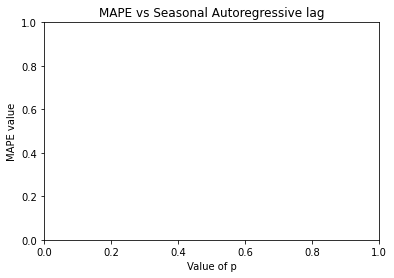

In [17]:
#For p(seasonal autoregressive lag)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][4],MAIN[i][0],'-*')
plt.title('MAPE vs Seasonal Autoregressive lag')
plt.xlabel('Value of p')
plt.ylabel('MAPE value')

Text(0, 0.5, 'MAPE value')

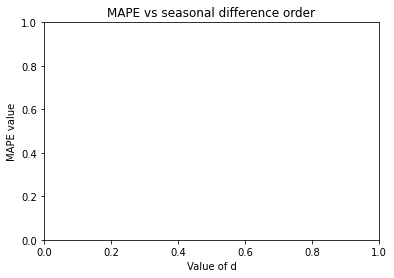

In [18]:
#For d(seasonal difference order)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][5],MAIN[i][0],'-*')
plt.title('MAPE vs seasonal difference order')
plt.xlabel('Value of d')
plt.ylabel('MAPE value')

Text(0, 0.5, 'MAPE value')

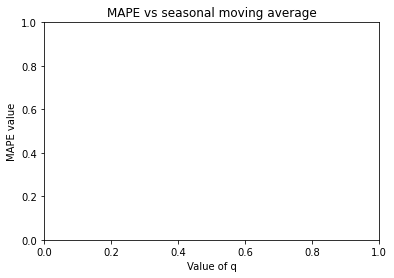

In [19]:
#For q(seasonal moving average)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][6],MAIN[i][0],'-*')
plt.title('MAPE vs seasonal moving average')
plt.xlabel('Value of q')
plt.ylabel('MAPE value')

Text(0, 0.5, 'MAPE value')

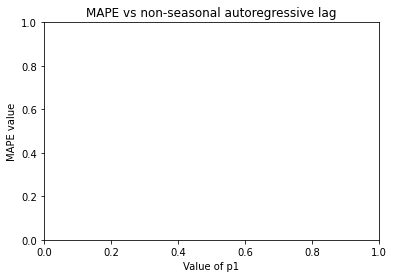

In [20]:
#For p1(non-seasonal autoregressive lag)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][1],MAIN[i][0],'-*')
plt.title('MAPE vs non-seasonal autoregressive lag')
plt.xlabel('Value of p1')
plt.ylabel('MAPE value')

Text(0, 0.5, 'MAPE value')

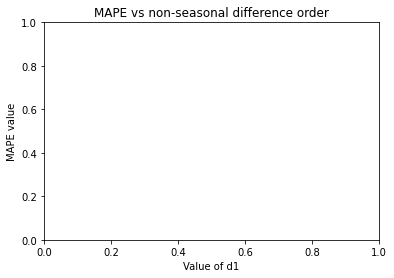

In [21]:
#For d1(non-seasonal difference order)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][2],MAIN[i][0],'-*')
plt.title('MAPE vs non-seasonal difference order')
plt.xlabel('Value of d1')
plt.ylabel('MAPE value')

Text(0, 0.5, 'MAPE value')

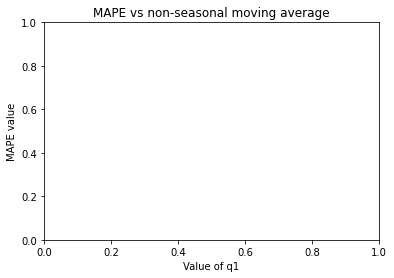

In [22]:
#For q1(non-seasonal moving average)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][3],MAIN[i][0],'-*')
plt.title('MAPE vs non-seasonal moving average')
plt.xlabel('Value of q1')
plt.ylabel('MAPE value')

Text(0, 0.5, 'MAPE value')

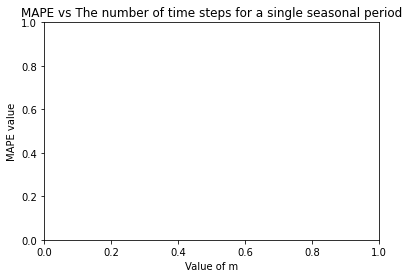

In [23]:
#For m(The number of time steps for a single seasonal period)
for i in range(len(MAIN)):
    plt.plot(MAIN[i][7],MAIN[i][0],'-*')
plt.title('MAPE vs The number of time steps for a single seasonal period')
plt.xlabel('Value of m')
plt.ylabel('MAPE value')